In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('housing_prices_training_set.csv')
data=data.drop('Id',axis=1)

In [3]:
if data.isnull().any().any()==False:
    print('There are no null vlaues in the dataset')
else:
    Null=data.isnull().sum()
    Null_to_handle=pd.DataFrame({'Columns':Null[Null.values!=0].index,'Null_Count':Null[Null.values!=0].values,
                                     'Null_perc_%':np.round(Null[Null.values!=0].values/len(data)*100,3)})
    print(Null_to_handle)
    

         Columns  Null_Count  Null_perc_%
0    LotFrontage         259       17.740
1          Alley        1369       93.767
2     MasVnrType         872       59.726
3     MasVnrArea           8        0.548
4       BsmtQual          37        2.534
5       BsmtCond          37        2.534
6   BsmtExposure          38        2.603
7   BsmtFinType1          37        2.534
8   BsmtFinType2          38        2.603
9     Electrical           1        0.068
10   FireplaceQu         690       47.260
11    GarageType          81        5.548
12   GarageYrBlt          81        5.548
13  GarageFinish          81        5.548
14    GarageQual          81        5.548
15    GarageCond          81        5.548
16        PoolQC        1453       99.521
17         Fence        1179       80.753
18   MiscFeature        1406       96.301


In [4]:
# upon reviewing the null values, it can be seen that certain features of the dataset secific to a certain attribute of the property have similar null
# values. Example the bs,t feature of the property is characterised by 'BsmtQual','BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2' features
# of the dataset. This could indicate that these features may not exist for the property in the first place.
# Rather than discarding the entire data point with these null valued features it is better to indicate their absence so as to retain valuable information.
# Such a similar pattern can be observed for the Garage attribute of the properties.

In [5]:
bsmt_null=[]
for i in Null_to_handle.Columns:
    if 'Bsmt' in i:
        bsmt_null.append(i)

Garage_null=[]
for i in Null_to_handle.Columns:
    if 'Garage' in i:
        Garage_null.append(i)

# will handle the null values accordingly later

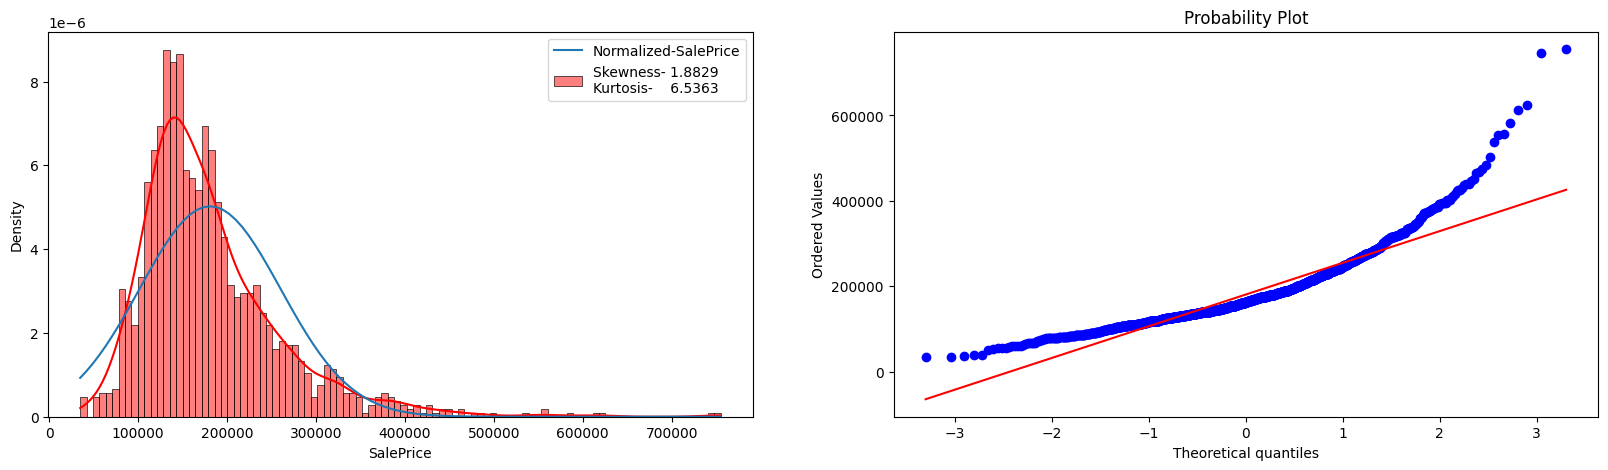

In [119]:
from scipy.stats import norm
from scipy import stats

fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axes=axes.flatten()
label=f'Skewness- {np.round(data['SalePrice'].skew(),4)}\nKurtosis-    {np.round(data['SalePrice'].kurt(),4)}'
sns.histplot(data=data,x='SalePrice',bins=100,stat='density',color='red',kde=True,label=label,ax=axes[0])
axes[0].legend()
X=np.linspace(data['SalePrice'].min(),data['SalePrice'].max(),100)
y=norm.pdf(X,data['SalePrice'].mean(),data['SalePrice'].std())
axes[0].plot(X,y,label='Normalized-SalePrice')
axes[0].legend()

stats.probplot(data['SalePrice'],dist='norm',plot=axes[1])
plt.show()

In [6]:
# A significant differnce in the actual distribution and the theoriitical distribution of the perfectly normalized curve representing Saleprice can be 
# observed.
# The distribution is positively skewed with a skewness of 1.8829 and has a kurtosis of 6.5363. Both indicating the presence of significant outliers 
# specifically towards the right.
# This is due to the outliers represented by data points corresponding to SalePrices at a higher range.
# Upon observing the quantile-quantile plot we can infer that there is significant departure from the diagonal (y=x) at regions representing 
# distributions beyond 1 standard deviation above the mean whereas a significant but lower departure can be observed at regions representing 
# distribution below its mean.
# The departure towards the lower end could be either due to the large amount of outliers towards the right or may be due to the genuine presence of 
# outliers towards the lower end of the distribution.

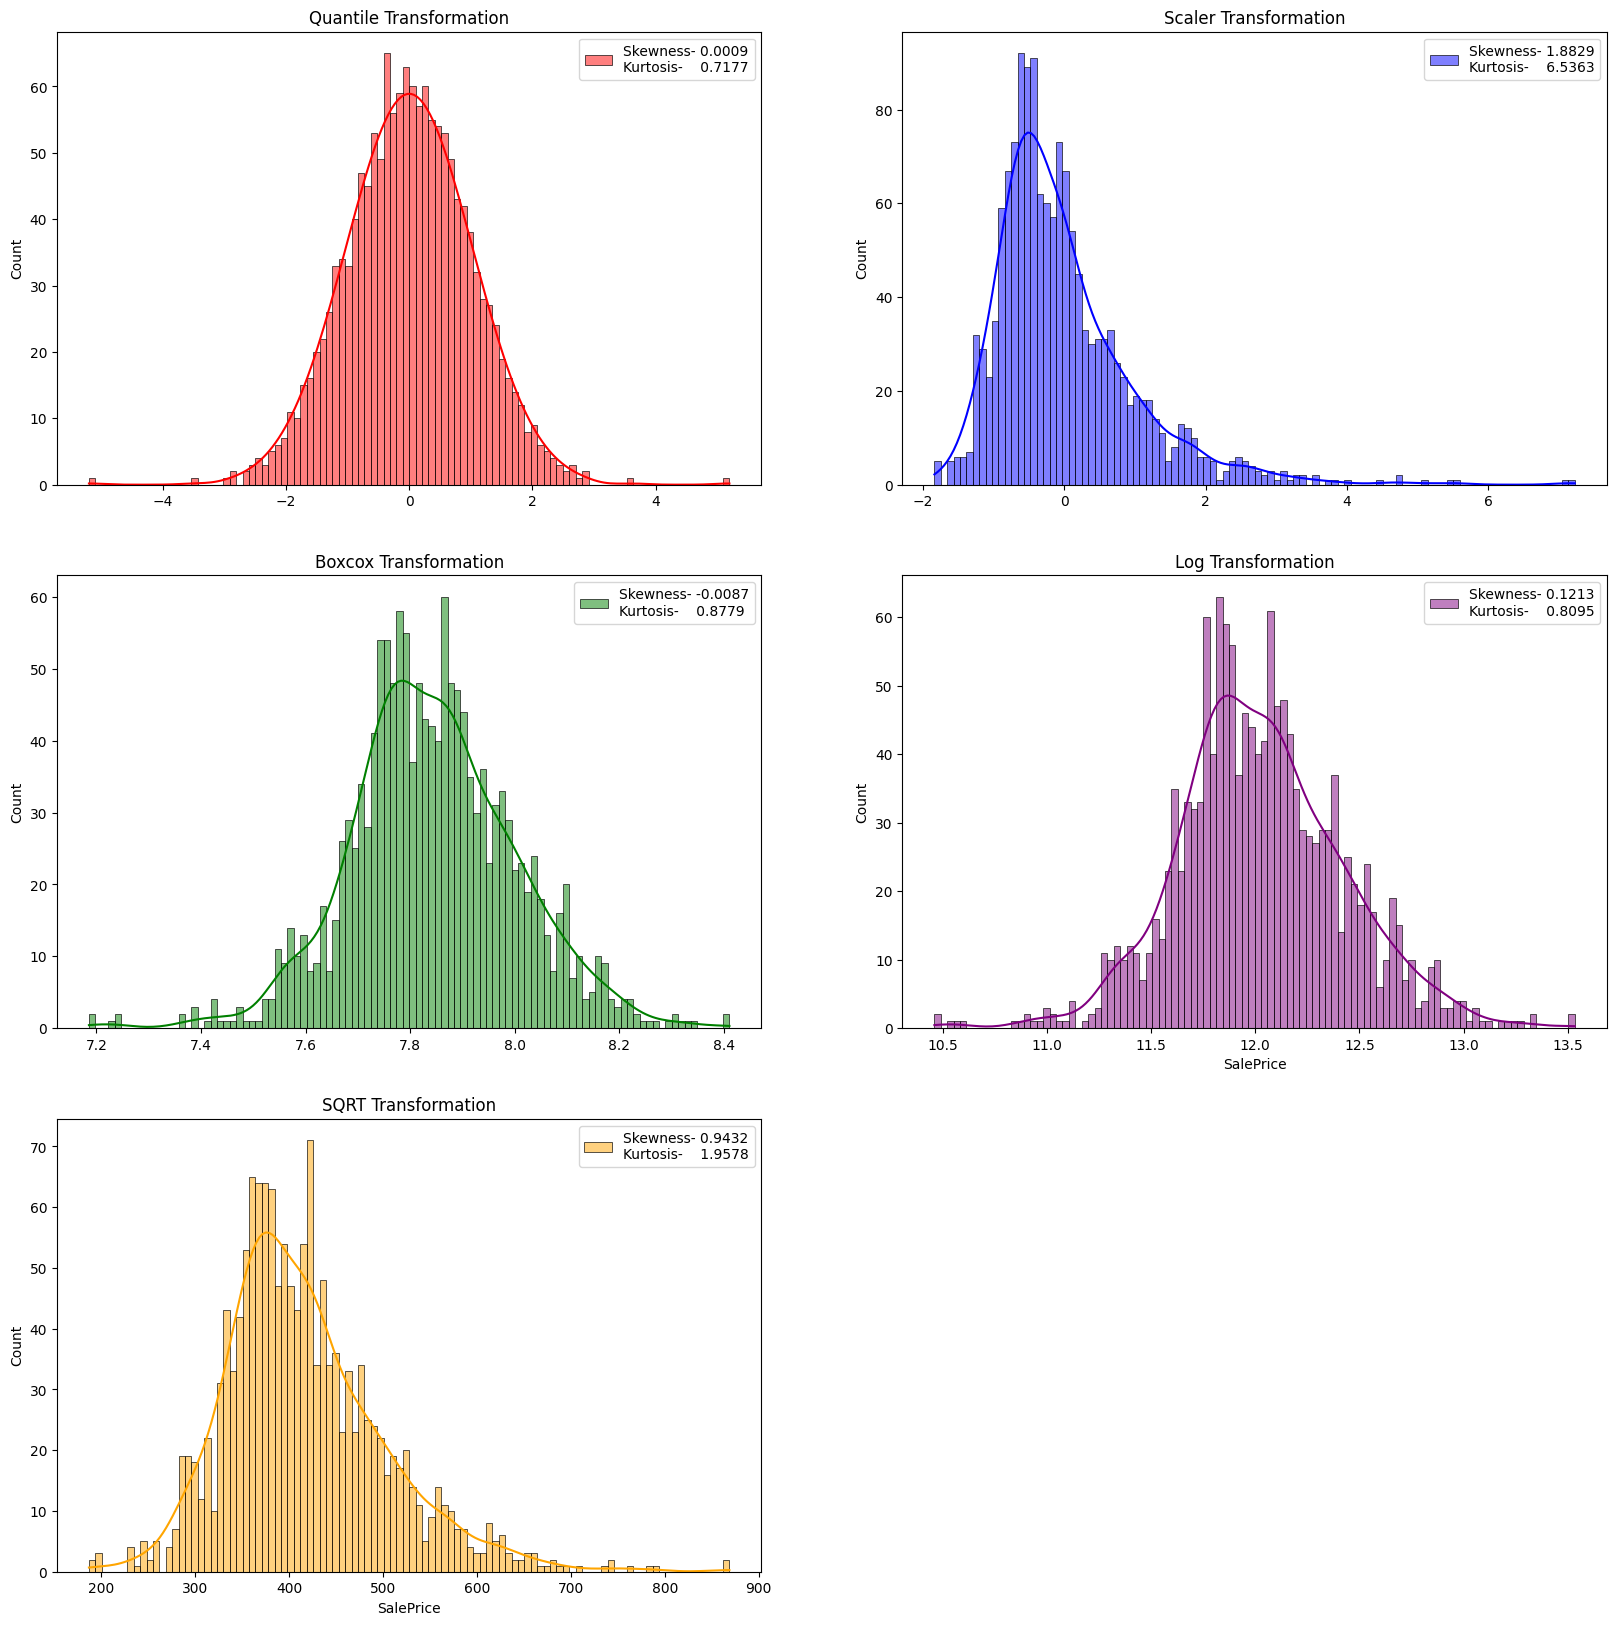

In [121]:
# suitable normalization transformations

from sklearn.preprocessing import StandardScaler,RobustScaler,QuantileTransformer
from scipy.stats import boxcox

fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
axes=axes.flatten()


qt=QuantileTransformer(output_distribution='normal').fit_transform(data[['SalePrice']])
qt=qt.reshape(len(qt),)
label=f'Skewness- {np.round(pd.Series(qt).skew(),4)}\nKurtosis-    {np.round(pd.Series(qt).kurt(),4)}'
sns.histplot(qt,bins=100,kde=True,label=label,ax=axes[0],color='red')
axes[0].set_title('Quantile Transformation')
axes[0].legend()

ss=StandardScaler().fit_transform(data[['SalePrice']])
ss=ss.reshape(len(ss),)
label=f'Skewness- {np.round(pd.Series(ss).skew(),4)}\nKurtosis-    {np.round(pd.Series(ss).kurt(),4)}'
sns.histplot(ss,bins=100,kde=True,ax=axes[1],label=label,color='blue')
axes[1].set_title('Scaler Transformation')
axes[1].legend()

tr,lambda_=boxcox(data['SalePrice'])
label=f'Skewness- {np.round(pd.Series(tr).skew(),4)}\nKurtosis-    {np.round(pd.Series(tr).kurt(),4)}'
sns.histplot(tr,bins=100,kde=True,ax=axes[2],label=label,color='green')
axes[2].set_title('Boxcox Transformation')
axes[2].legend()

log_sp=np.log(data['SalePrice']+1)
label=f'Skewness- {np.round((log_sp).skew(),4)}\nKurtosis-    {np.round((log_sp).kurt(),4)}'
sns.histplot(log_sp,bins=100,kde=True,ax=axes[3],label=label,color='purple')
axes[3].set_title('Log Transformation')
axes[3].legend()

sqrt_sp=np.sqrt(data['SalePrice'])
label=f'Skewness- {np.round((sqrt_sp).skew(),4)}\nKurtosis-    {np.round((sqrt_sp).kurt(),4)}'
sns.histplot(sqrt_sp,bins=100,kde=True,ax=axes[4],label=label,color='orange')
axes[4].set_title('SQRT Transformation')
axes[4].legend()

for i in range(5,len(axes)):
    fig.delaxes(axes[i])

In [ ]:
# each transformation method normalizes the data differently. Thus it is imperative to judge the modle performance for these transformations.
# Models with skewness and kurtosis such as Quantile, Boxcox and log transform that are quite different from the statistical characterestics of the 
# original distributed data may lead to loss of valuable information and may end up having reduced overall variability within the target variable
# distribution for the model to learn from
# SQRT tends to be less normalized while StandardScaler has apparanetly no effect on the skewness and Kurtosis of the data.
# Analysing the effect of each transformation will help understand the model(s) ability to comprehend the variability within the dependent variable.

In [7]:
# I have 3 categorical variables PoolQC MiscFeature and Fence with 99%, 96% and 80% missing values
# I have other two variables Alley and MasVnrType is 93 % and 59% respectively

In [6]:
# Handling features other than the ones linked to Bsmt and Garage
linked_features=[]
for i in data.columns:
    for j in ['Pool','Fence','Misc','Fire']:
        if j in i:
            linked_features.append(i)
linked_features

['Fireplaces',
 'FireplaceQu',
 'PoolArea',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MiscVal']

In [7]:
if data.loc[data['FireplaceQu'].isna(),'Fireplaces'].values.any()==True:
    print('There are data points with Fireplaces greater than zero where FireplaceQu values are missing')
else:
    print('There are no data points with Fireplaces greater than zero where FireplaceQu values are missing indicating clear absence of feature')

There are no data points with Fireplaces greater than zero where FireplaceQu values are missing indicating clear absence of feature


In [8]:
if (pd.DataFrame(data.loc[data['PoolQC'].isna(),'PoolArea']).any(axis=1)!=0).sum()!=0:
    print('There are PoolAreas greater than zero where PoolQC values are missing that could potentially indicate absence of infromation rather than feature')
else:
    print('There are no PoolAreas greater than zero where PoolQC values are missing indicating the clear absence of feature rather than an error')
    

There are no PoolAreas greater than zero where PoolQC values are missing indicating the clear absence of feature rather than an error


In [9]:
if (pd.DataFrame(data.loc[data['MiscFeature'].isna(),'MiscVal']).any(axis=1)!=0).sum()!=0:
    print('There are MiscVal greater than zero where MiscFeature values are missing')
else:
    print('There are no MiscVal greater than zero where MiscFeature values are missing indicating clear absence of feature')
    

There are no MiscVal greater than zero where MiscFeature values are missing indicating clear absence of feature


In [10]:
# The observations indicate that the values are missing due to the the absence of the features representing the corresponding data points

In [11]:
#create copy of data for training
data_1=data.copy()

In [12]:
# PoolQC and PoolArea can be solely represented by PoolArea which has more relevant numerical information regarding the pool feature.
# PoolQC can be dropped due to its categorical nature and only 7 values out of 1460 which would potentially have no relevant variability and could 
# contribute as noise in the dataset
# Retain MiscFeature and Fence as they are relevant attributes of the property and may aid decision making rather than improving model performance.
data_1=data_1.drop('PoolQC',axis=1)
data_1['MiscFeature']=data_1['MiscFeature'].fillna('No')
data_1['Fence']=data_1['Fence'].fillna('No')

In [13]:
# handling Garage and Bsmnt
# we can impute the categorical features using No rather than the most frequent unique value to maintian data genuinity and avoid bias

In [14]:
# effect of -1 and 0 imputation on GarageYrBlt
values=[]
for i in (-1,0):
    gr_yrblt=data_1[['GarageYrBlt']].copy()
    gr_yrblt.loc[gr_yrblt['GarageYrBlt'].isna(),'GarageYrBlt']=i
    values.append(gr_yrblt.describe().values.reshape(len(gr_yrblt.describe()),))
imp_effect=pd.DataFrame({'statistical_char':gr_yrblt.describe().index,
                         'No imputation':gr_yrblt.describe().values.reshape(len(gr_yrblt.describe()),),
                         '-1 Imputation':values[0],
                        '0 Imputation':values[1]})    
imp_effect
# no differences observed while using both the imputation techniques on the dataset but differences may occur while running the imputed datasets in
# a machine learning model 
# -1 would be appropriate to impute as the feature represents the year the specific attribute of the property was built.

,statistical_char,No imputation,-1 Imputation,0 Imputation
0,count,1460.000000,1460.000000,1460.000000
1,mean,1868.739726,1868.684247,1868.739726
2,std,453.697295,453.925967,453.697295
3,min,0.000000,-1.000000,0.000000
4,25%,1958.000000,1958.000000,1958.000000
5,50%,1977.000000,1977.000000,1977.000000
6,75%,2001.000000,2001.000000,2001.000000
7,max,2010.000000,2010.000000,2010.000000


In [15]:
data[Garage_null].isnull().sum()
# all null values are associated with each other

GarageType      81
GarageYrBlt     81
GarageFinish    81
GarageQual      81
GarageCond      81
dtype: int64

In [16]:
# garage
#Garage_null
for i in Garage_null:
    if data_1[i].dtype=='float64':
        data_1[i]=data_1[i].fillna(-1)
    else:
        data_1[i]=data_1[i].fillna('No')
        

In [17]:
data[bsmt_null].isnull().sum()
# all values are not associated with each other
# BsmtExposure and BsmtFinType2 has 1 null vlaue each that is not associated to the absence of the feature
# those 2 values must be handled by regular imputation

BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
dtype: int64

In [18]:
# Bsmt
#bsmt_null
# handle BsmtExposure and BsmtFinType2 seperately first
data_1.loc[data_1['BsmtQual'].isna(),'BsmtExposure']='No'
data_1.loc[data_1['BsmtQual'].isna(),'BsmtFinType2']='No'
data_1['BsmtExposure']=data_1['BsmtExposure'].fillna(data_1['BsmtExposure'].value_counts().index[0])
data_1['BsmtFinType2']=data_1['BsmtFinType2'].fillna(data_1['BsmtFinType2'].value_counts().index[0])
# as null values are handle for these 2 leaving the nul values that are not associated with the absence of the fetaure
# handle the absence of the values in other features

for i in ['BsmtQual', 'BsmtCond', 'BsmtFinType1']:
    data_1[i]=data_1[i].fillna('No')
        

In [19]:
# handling other missing values

In [20]:
data_1['LotFrontage']=data_1['LotFrontage'].fillna(data_1['LotFrontage'].mean())

In [21]:
data_1['FireplaceQu']=data_1['FireplaceQu'].fillna('No')

In [22]:
data_1['Alley']=data_1['Alley'].fillna('No')

In [23]:
Null=data_1.isnull().sum()
Null_to_handle=pd.DataFrame({'Columns':Null[Null.values!=0].index,'Null_Count':Null[Null.values!=0].values,
                             'Null_perc_%':np.round(Null[Null.values!=0].values/len(data)*100,3)})
Null_to_handle

,Columns,Null_Count,Null_perc_%
0,MasVnrType,872,59.726
1,MasVnrArea,8,0.548
2,Electrical,1,0.068


In [24]:
#masvnr=data_1[['MasVnrType','MasVnrArea']]

In [25]:
#for i in masvnr[(masvnr['MasVnrArea'].isnull()!=True) & (masvnr['MasVnrArea']!=0)].index:
#    data_1.loc[i,'MasVnrType']=data_1['MasVnrType'].value_counts().index[0]

In [26]:
#fill the rest of the MasVnrArea with 0 to indicate absence and rest of the MasVnrType with new value No
data_1['MasVnrType']=data_1['MasVnrType'].fillna('No')
data_1['MasVnrArea']=data_1['MasVnrArea'].fillna(0)

In [27]:
if data_1.loc[data_1['MasVnrArea']==0,'MasVnrType'].any()!='No':
    print('preprocessing needed for MasVnrType')
    

preprocessing needed for MasVnrType


In [28]:
for index in data_1[(data_1['MasVnrArea']==0)&(data_1['MasVnrArea']!='No')].index:
    data_1.loc[index,'MasVnrType']='No'

In [29]:
Null=data_1.isnull().sum()
Null_to_handle=pd.DataFrame({'Columns':Null[Null.values!=0].index,'Null_Count':Null[Null.values!=0].values,
                             'Null_perc_%':np.round(Null[Null.values!=0].values/len(data)*100,3)})
Null_to_handle

,Columns,Null_Count,Null_perc_%
0,Electrical,1,0.068


In [30]:
data_1['Electrical']= data_1['Electrical'].fillna(data_1['Electrical'].value_counts().index[0])
        

In [31]:
# all null values handled as needed

In [32]:
# categorize the features accordingly

In [33]:
obj_data=data_1.select_dtypes(include='object')

In [34]:
check_feature=[]
for index,row in obj_data.iterrows():
    for i in obj_data.columns:
        if not pd.isna(pd.to_numeric(row[i],errors='coerce')):
            check_feature.append(i)

In [35]:
# no object features that could be converted into numerical such as '2'
check_feature

[]

In [36]:
num_data=data_1.drop(obj_data.columns,axis=1)

In [37]:
#change dtype of MSSubClass
data_1['MSSubClass']=data_1['MSSubClass'].astype('str')

In [38]:
#correctly identified dtpes
obj_data=data_1.select_dtypes(include='object')
num_data=data_1.drop(obj_data.columns,axis=1)

In [39]:
# identify numerical features that could be converted into categorical features with low cardinality (low number of unique values of the numerical feature)
# check weather the features better of left as numerical using correlation

In [42]:
for i in num_data.columns:
    nunique=num_data.nunique()
    nunique=pd.DataFrame({'Columns':num_data.columns,'Nunique':nunique})
nunique[nunique['Nunique']<120]
    

,Columns,Nunique
LotFrontage,LotFrontage,111
OverallQual,OverallQual,10
OverallCond,OverallCond,9
YearBuilt,YearBuilt,112
YearRemodAdd,YearRemodAdd,61
LowQualFinSF,LowQualFinSF,24
BsmtFullBath,BsmtFullBath,4
BsmtHalfBath,BsmtHalfBath,3
FullBath,FullBath,4
HalfBath,HalfBath,3


In [40]:
# features with potential to exist as categorical based on its possible categorical characteristics
# OverallQual
# OverallCond
# YearBuilt
# YearRemodAdd
# GarageYrBlt
# GarageCars
# YrSold
# MoSold
# MiscVal

In [41]:
check_features=['OverallQual','OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','GarageCars','YrSold','MoSold','MiscVal','SalePrice']

In [42]:
corr_check_features=num_data[check_features]
corr_check_features=corr_check_features.corr()
corr_check_features[corr_check_features.ge(1)]=0

In [46]:
high_corr=[]
mod_corr=[]
low_corr=[]
no_corr=[]
for i in [0.7,0.4]:
    for j in list(corr_check_features.abs().ge(0.7).any()[corr_check_features.abs().ge(0.7).any()==True].index):
        if j not in high_corr:
            high_corr.append(j)
    for j in list(corr_check_features.abs().ge(0.4).any()[corr_check_features.abs().ge(0.4).any()==True].index):
        if j not in high_corr and j not in mod_corr:
            mod_corr.append(j)
    for j in list(corr_check_features.abs().ge(0.2).any()[corr_check_features.abs().ge(0.2).any()==True].index):
        if j not in high_corr and j not in mod_corr and j not in low_corr:
            low_corr.append(j)

for i in corr_check_features.columns:
    if i not in high_corr and i not in mod_corr and i not in low_corr:
        no_corr.append(i)
        

In [47]:
# suggested feature engineering based on presence of possible low cardinal features among numerical features

In [48]:
print(high_corr,'have high significant correlation with other numerical variables')
print('\n')
print(mod_corr,'have mod significant correlation with other numerical variables')
print('\n')
print(low_corr,'have low significant correlation with other numerical variables')
print('\n')
print(no_corr,'have no significant correlation with other numerical variables')
print('\n')
print(low_corr+(no_corr),'Possibly convert into potential low cardinal categorical variables')

['OverallQual', 'SalePrice'] have high significant correlation with other numerical variables


['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'GarageCars'] have mod significant correlation with other numerical variables


['OverallCond'] have low significant correlation with other numerical variables


['YrSold', 'MoSold', 'MiscVal'] have no significant correlation with other numerical variables


['OverallCond', 'YrSold', 'MoSold', 'MiscVal'] Possibly convert into potential low cardinal categorical variables


In [43]:
# convert to categorical
# OverallCond
# YrSold
# MoSold
# MiscVal

In [44]:
data_temp=data_1.copy()
data_temp['SalePrice']=np.log(data_temp['SalePrice']+1)

In [45]:
# SHAPIRO TEST
from scipy.stats import shapiro
from scipy.stats import kruskal


data_temp=data_1.copy()
data_temp['SalePrice']=np.log(data_temp['SalePrice']+1)

for i in ['OverallCond', 'YrSold', 'MoSold', 'MiscVal']:
    print(f'\n\n\nShapiro Test for feature-{i}')
    print('-----------------------------------------------------------------------------------------------------------------------------------------')
    data_temp_sp_oc=data_temp[[i,'SalePrice']]
    data_temp_sp_oc.loc[:,i]=data_temp_sp_oc[i].astype('str')
    temp_p_value=[]
    for cond,grouped_sp in data_temp_sp_oc.groupby(i)['SalePrice']:
        if len(grouped_sp)>=3:
            stats,p_value=shapiro(grouped_sp)
            temp_p_value.append(p_value)
            if p_value>=0.05:
                print(f'Fail to reject the null hypothesis: the grouped data for category-{cond} appears to be normally distributed-',p_value)
            else:
                print(f'Reject the null hypothesis: the grouped data for category-{cond} does not appear to be normally distributed-',p_value)
    
        else:
            print(f'Not enough data points to represent the grouped data for category-{cond}')
    
    if any(pval<0.05 for pval in temp_p_value):
        print(f'\nThe grouped data for all values of {i} do not appear to be normally distributed')
        print('-----------------------------------------------------------------------------------------------------------------------------------------')
        print(f'\nKruskal Test for feature-{i}')
        print('-----------------------------------------------------------------------------------------------------------------------------------------')
        
        # kruskal test
        
        kruskal_list=[]
        for cond,grouped_sp in data_temp_sp_oc.groupby(i)['SalePrice']:
            kruskal_list.append(grouped_sp)
        stats,p_value=kruskal(*kruskal_list)
        if p_value>=0.05:
            print('Fail to reject null hypothesis there is no significant difference among the different groups based on the kruskal test-',p_value)
        else:
            print('Reject null hypothesis there is significant difference among the different groups based on the kruskal test-',p_value)
        print('-----------------------------------------------------------------------------------------------------------------------------------------')
        print('-----------------------------------------------------------------------------------------------------------------------------------------')
            




Shapiro Test for feature-OverallCond
-----------------------------------------------------------------------------------------------------------------------------------------
Not enough data points to represent the grouped data for category-1
Reject the null hypothesis: the grouped data for category-2 does not appear to be normally distributed- 0.006961039733141661
Fail to reject the null hypothesis: the grouped data for category-3 appears to be normally distributed- 0.6784935593605042
Fail to reject the null hypothesis: the grouped data for category-4 appears to be normally distributed- 0.2472100853919983
Reject the null hypothesis: the grouped data for category-5 does not appear to be normally distributed- 0.023327842354774475
Reject the null hypothesis: the grouped data for category-6 does not appear to be normally distributed- 1.6083757259366394e-07
Reject the null hypothesis: the grouped data for category-7 does not appear to be normally distributed- 0.0012400182895362377
Rejec

<Axes: xlabel='sp_bins', ylabel='count'>

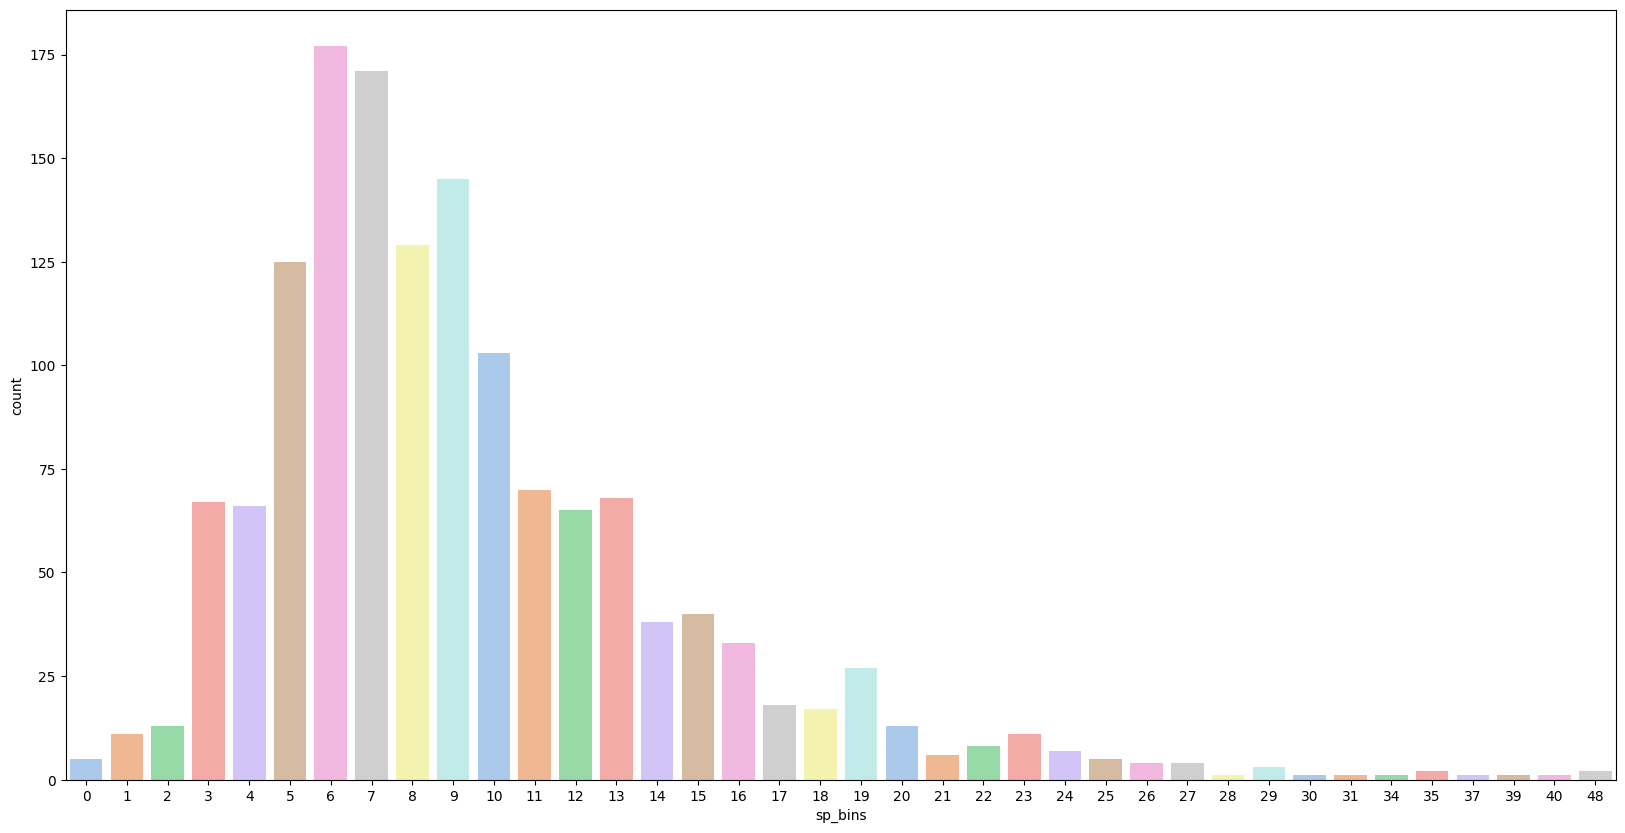

In [615]:
# creating SalePrice bins to address price point representation of dataset
plt.figure(figsize=(20,10))
data_bin_sp=data_1.copy()
bins=np.linspace(data_bin_sp['SalePrice'].min()-1,data_bin_sp['SalePrice'].max(),50)
bin_labels=[]
for i in range(0,len(bins)-1):
    bin_labels.append(i)
data_bin_sp['sp_bins']=pd.cut(data_1['SalePrice'],bins=bins,labels=bin_labels).astype(float)
data_bin_sp['sp_bins']=data_bin_sp['sp_bins'].astype('int')
sns.countplot(data=data_bin_sp,x='sp_bins',hue='sp_bins',palette=sns.color_palette('pastel',data_bin_sp['sp_bins'].nunique()),legend=False)

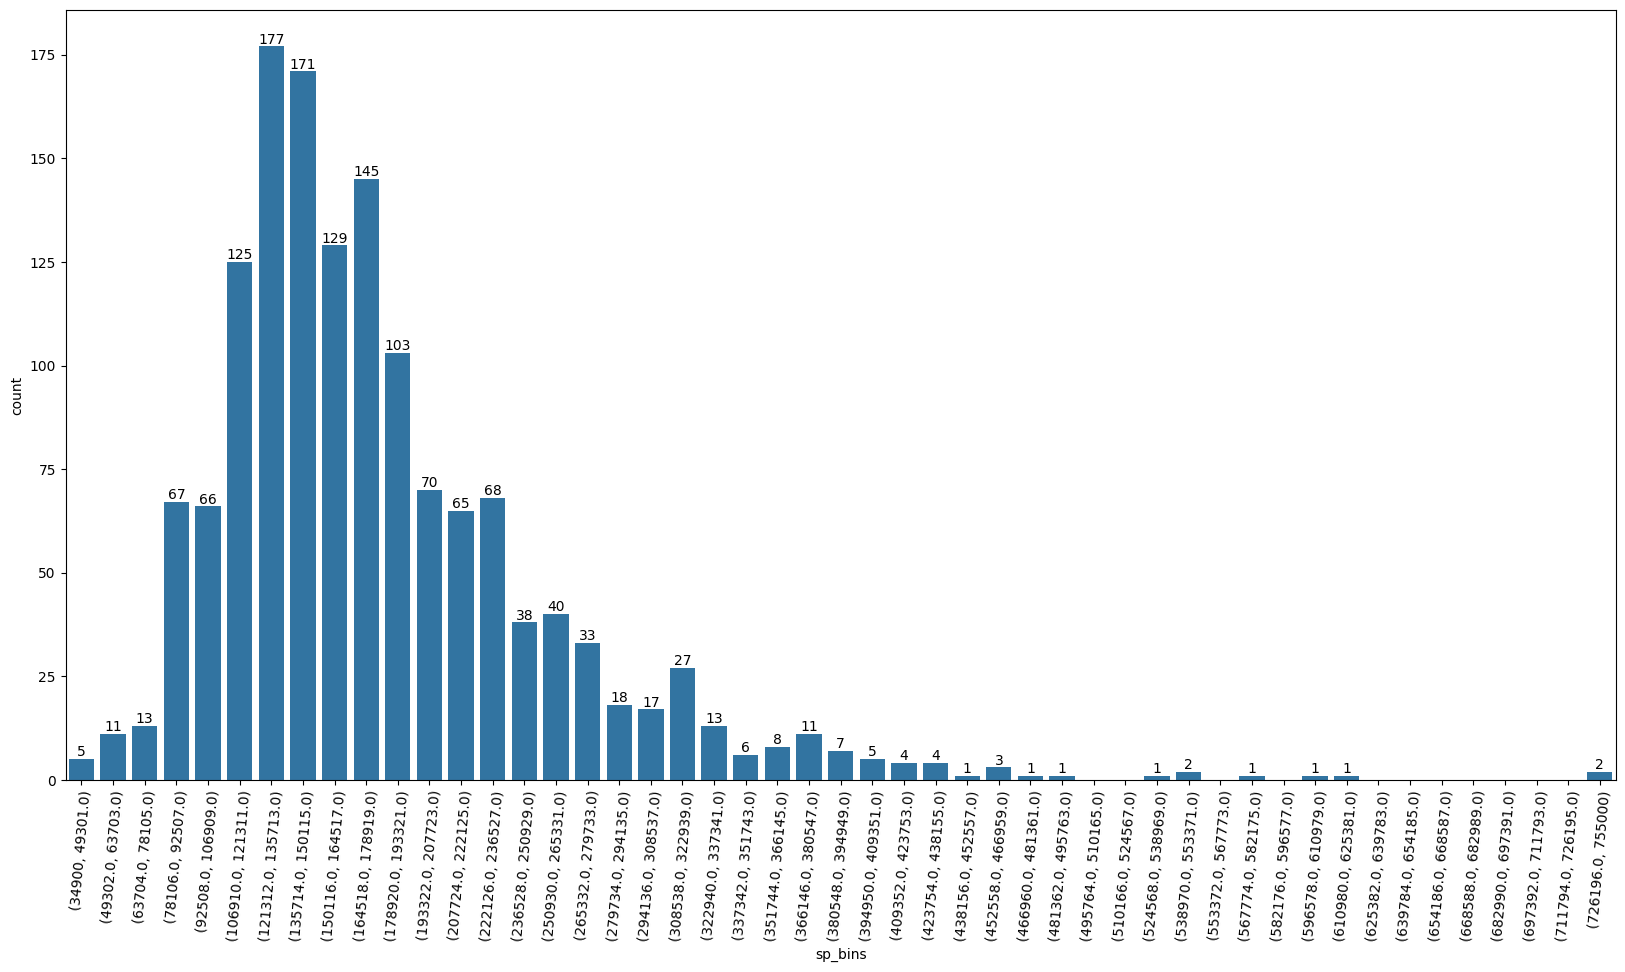

In [698]:
# price point representation of dataset
plt.figure(figsize=(20,10))
data_bin_sp=data_1.copy()
bins=np.linspace(data_bin_sp['SalePrice'].min()-1,data_bin_sp['SalePrice'].max(),50)

int_bin=[]
bin_width=(data_bin_sp['SalePrice'].max()-data_bin_sp['SalePrice'].min())/50

for i in range(0,len(bins)-1):
    
    if i==0:
        int_bin.append((data_bin_sp['SalePrice'].min(),data_bin_sp['SalePrice'].min()+bin_width*(i+1)-1))

    elif i==len(bins)-2:
        int_bin.append((int_bin[-1][1]+1,data_bin_sp['SalePrice'].max()))
    else:
        int_bin.append((int_bin[-1][1]+1,data_bin_sp['SalePrice'].min()+bin_width*(i+1)-1))

for i,value in enumerate(int_bin):
    int_bin[i]=str(int_bin[i])
    
data_bin_sp['sp_bins']=pd.cut(data_1['SalePrice'],bins=bins,labels=int_bin)
bin_counts=data_bin_sp['sp_bins'].value_counts()
ax=sns.countplot(data=data_bin_sp,x='sp_bins',legend=False)
plt.xticks(rotation=85)
for p in ax.patches:
    ax.text(p.get_x()+p.get_width()/2,p.get_height(),int(p.get_height()),va='bottom',ha='center')
plt.show()

In [52]:
#identifying any strong linear relations between the features and the dependent variable
highly_correlated_features_sp=data_1[num_data.columns].corr()['SalePrice'][data_1[num_data.columns].corr()['SalePrice'].abs().ge(0.6)][:-1]
highly_correlated_features_sp

OverallQual    0.790982
TotalBsmtSF    0.613581
1stFlrSF       0.605852
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64

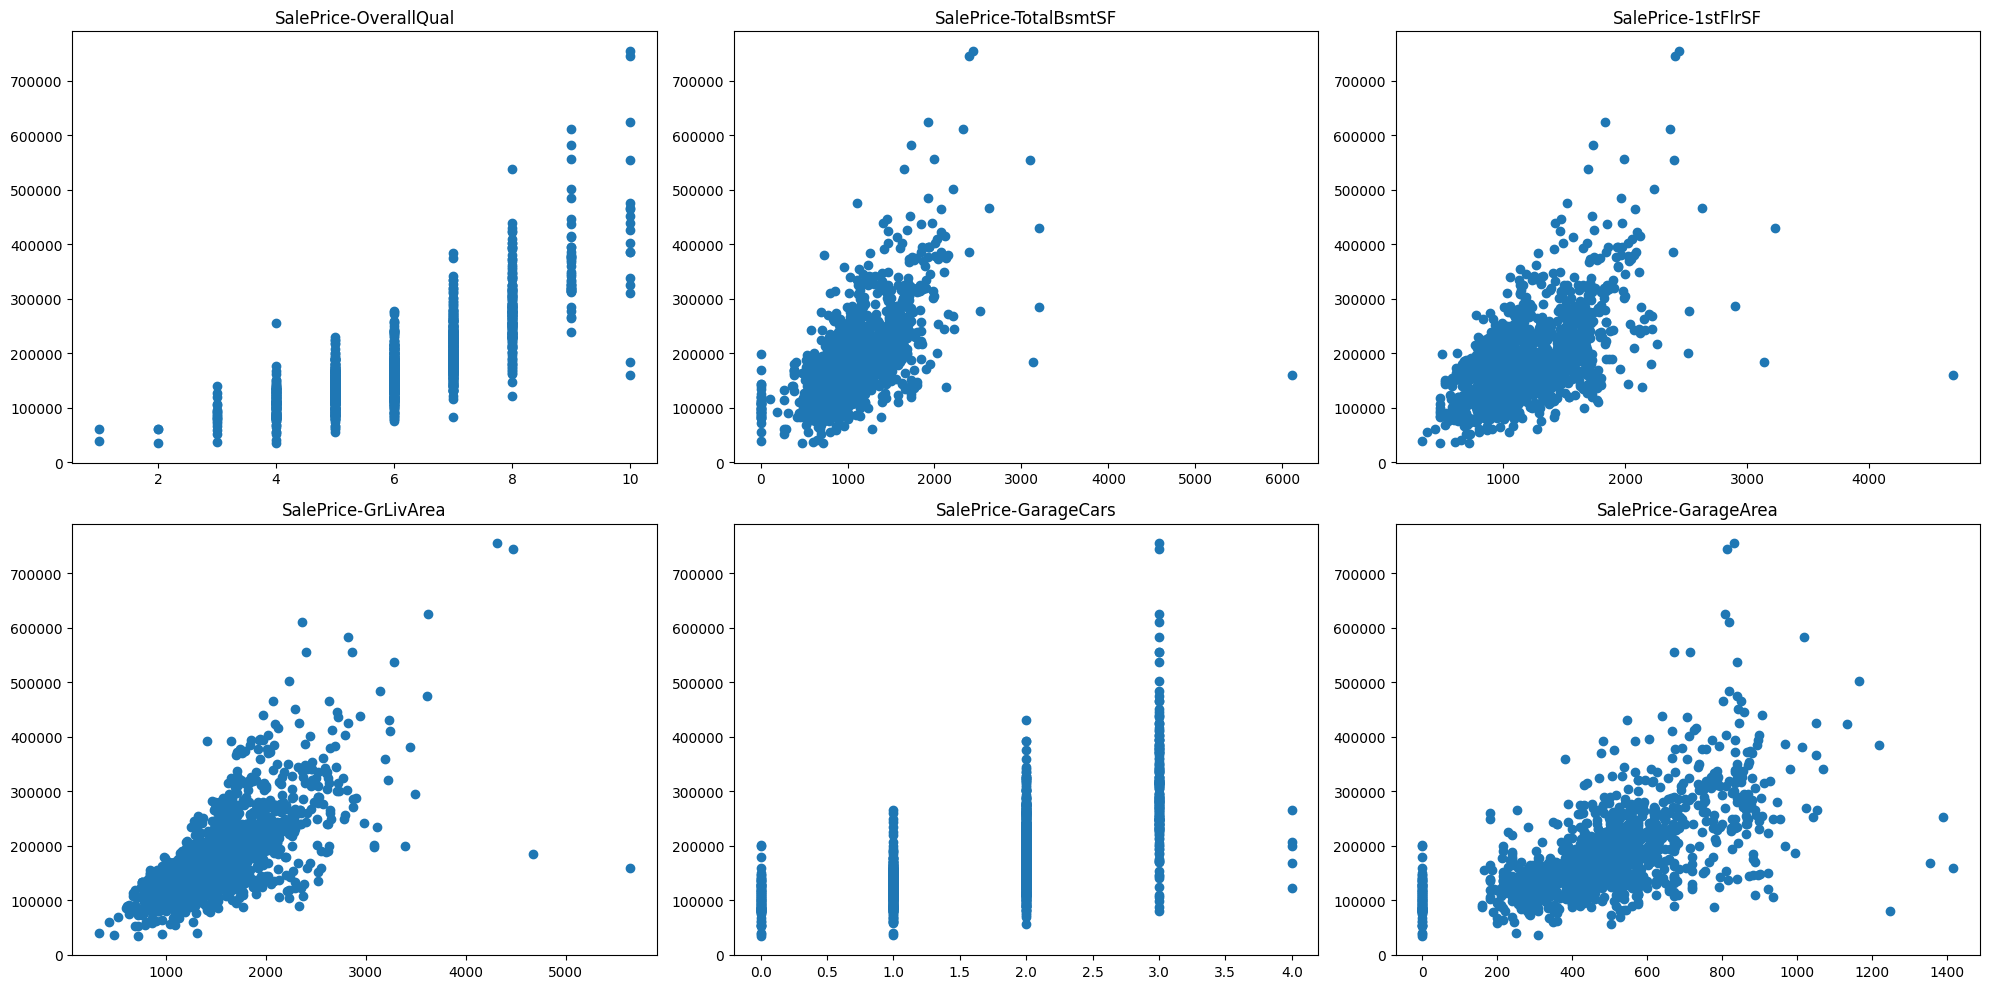

In [53]:
import matplotlib.pyplot as plt
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axes=axes.flatten()
for i,feature in enumerate(highly_correlated_features_sp.index):
    axes[i].scatter(y=data_1['SalePrice'],x=data_1[feature])
    axes[i].set_title('SalePrice-'+feature)
plt.tight_layout()

In [54]:
# based on observed scatterplots it can be inferred that the features TotalBsmtSf and GrLiveArea are the numerical features that tend to be highly 
# correlated with the target variable.
# an increase in the density of the scattered points at the beginning is due to the imbalance in SalePrice representation in terms of specific price 
# points 
# A valid inference can also be made on the increased spread of data points for properties valued at higher SalePrice. These data points mostly represent
# outliers based on our previous description of target dist identifying it to be highky skewed and peaked. The increased variance indicated by the spread indicates lower predictability
# of higher target values.

In [55]:
obj_data.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence',
       'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

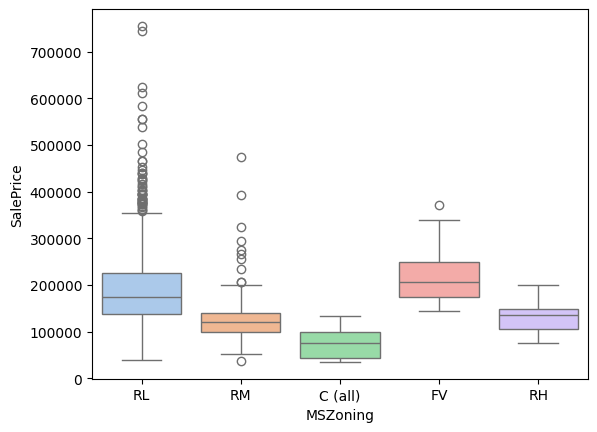

In [56]:
sns.boxplot(data=data_1,x='MSZoning',hue='MSZoning',y='SalePrice',palette=sns.color_palette('pastel',data_1['MSZoning'].nunique()))

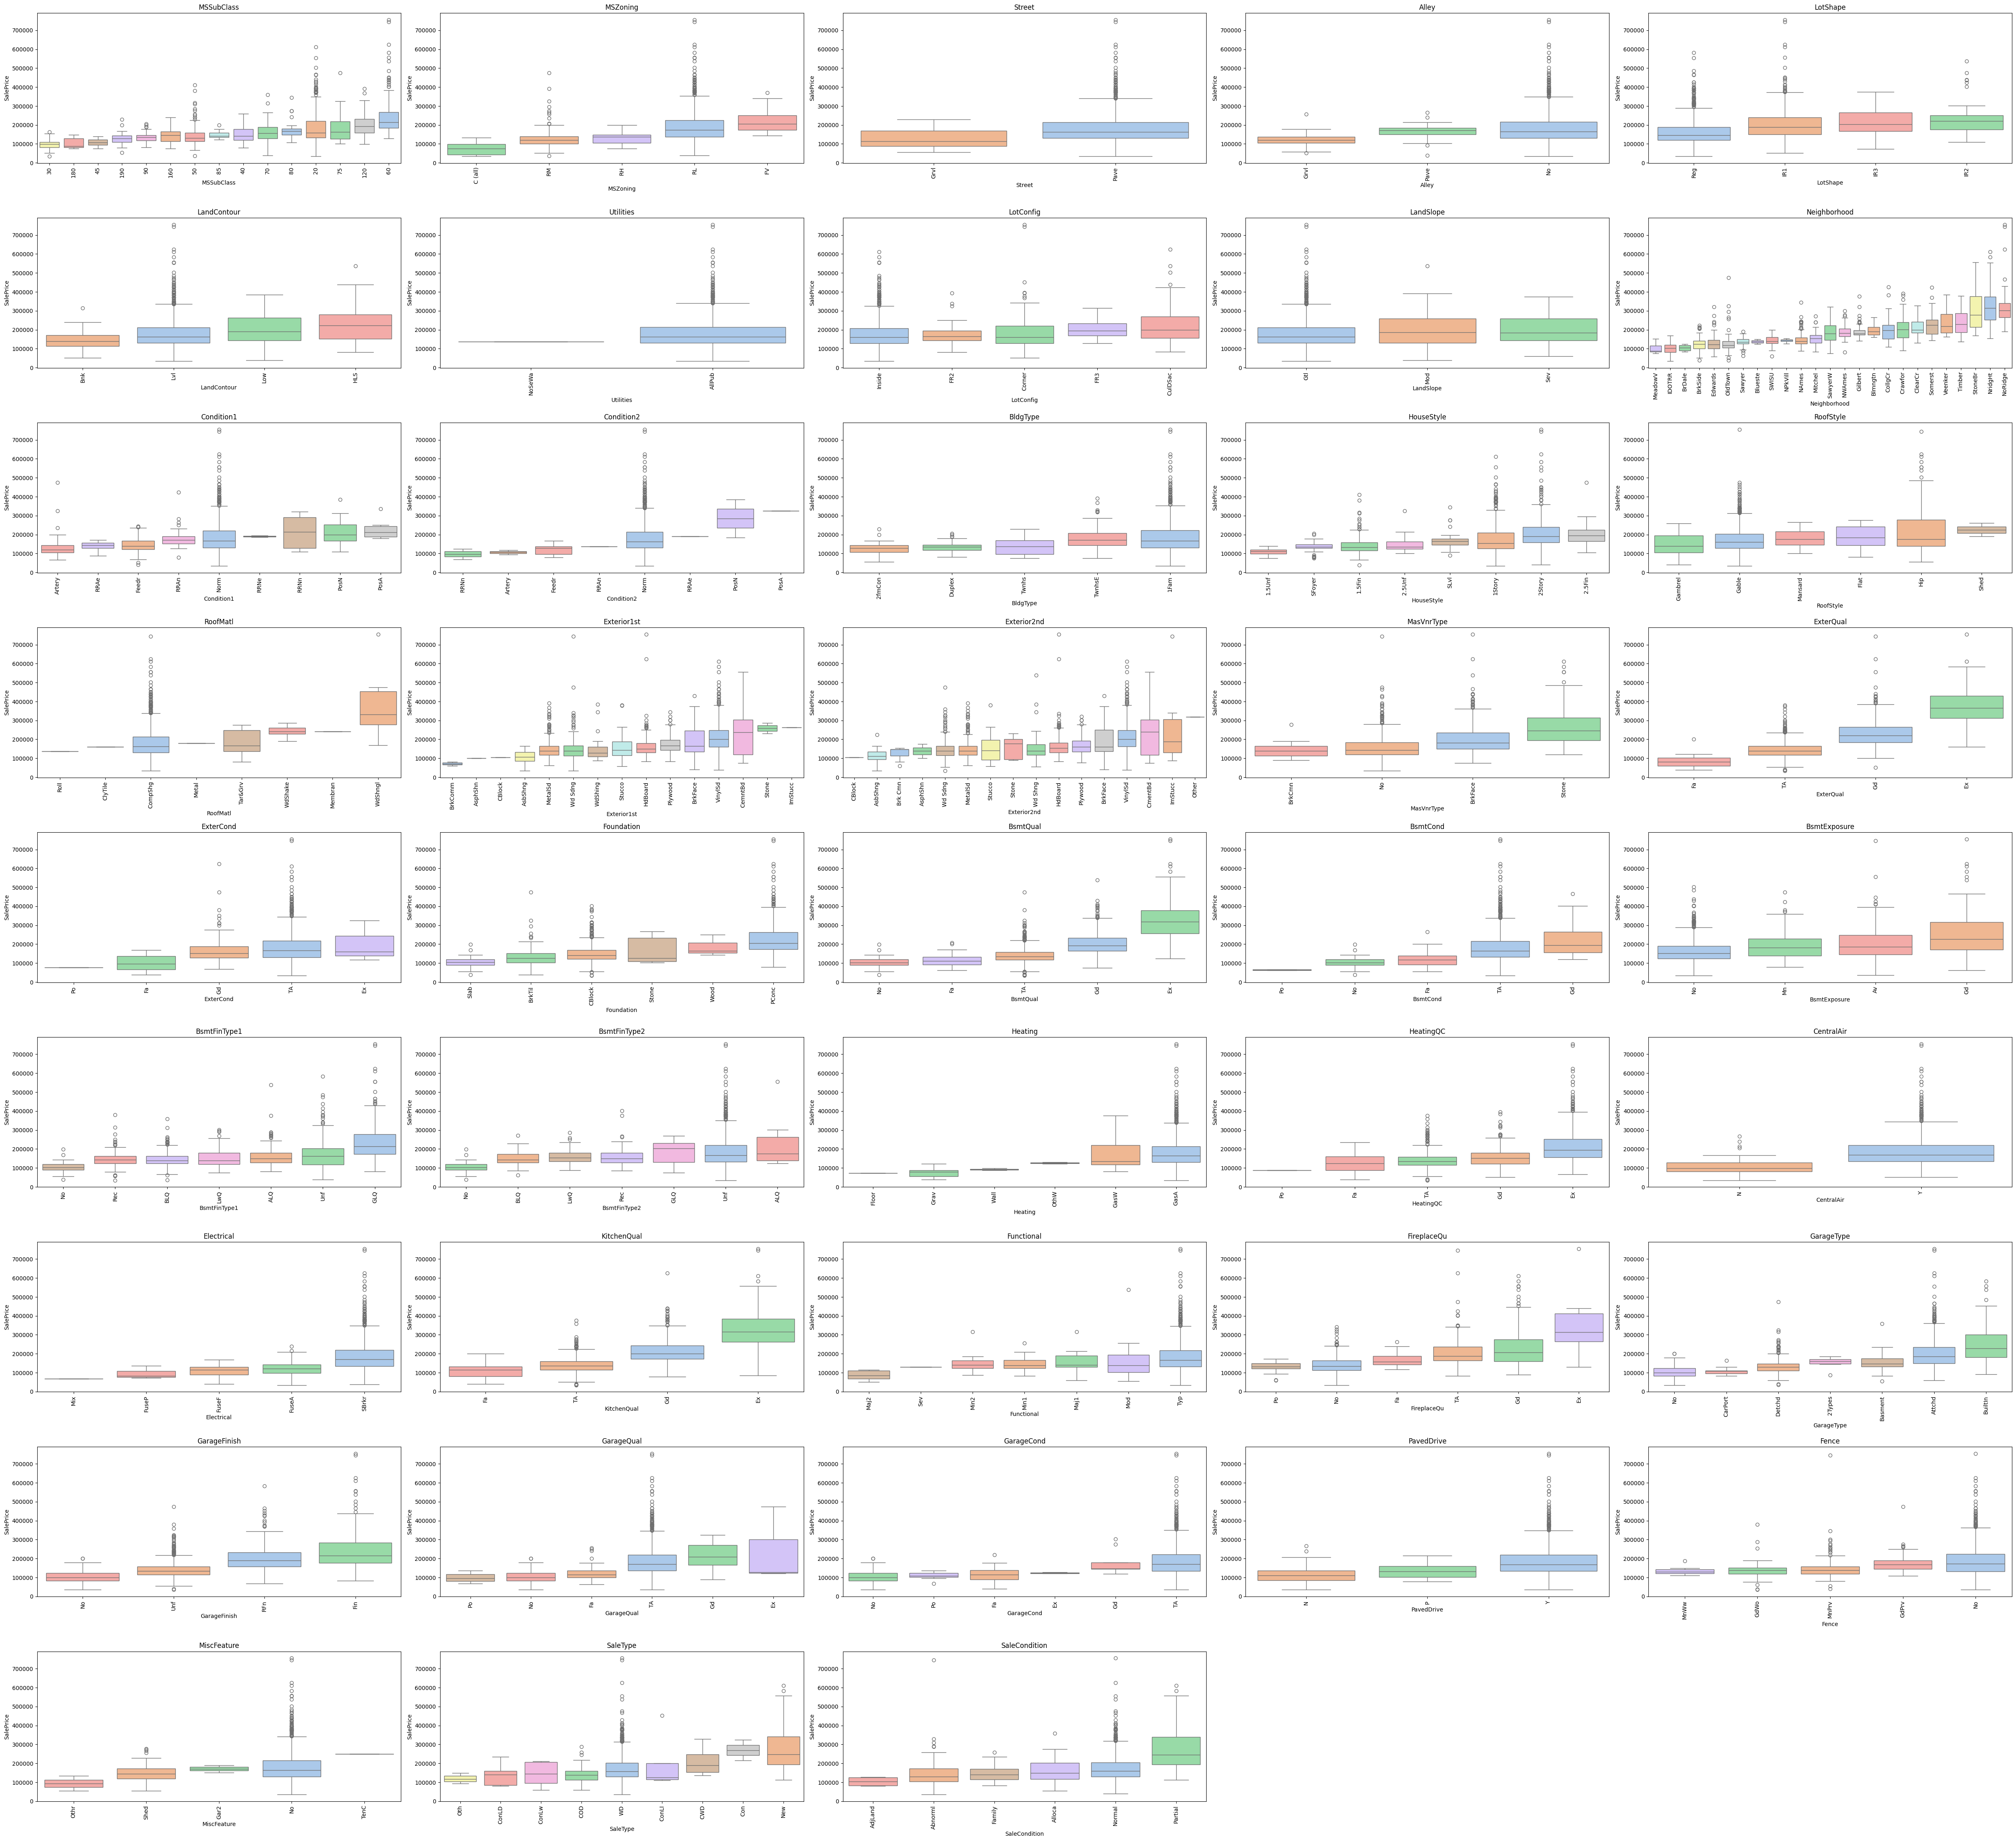

In [57]:
# visualizaing the categorical variables
fig,axes=plt.subplots(nrows=10,ncols=5,figsize=(50,50))
axes=axes.flatten()
for i,feature in enumerate(obj_data.columns):
    sorted=data_1.groupby(feature)['SalePrice'].mean().sort_values()
    sorted=list(sorted.index)
    sns.boxplot(data=data_1,x=feature,hue=feature,y='SalePrice',order=sorted,palette=sns.color_palette('pastel',len(sorted)),ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x',rotation=90)
plt.tight_layout()
for i in range(len(obj_data.columns),len(axes)):
    fig.delaxes(axes[i])

In [58]:
q1=num_data.quantile(0.25)
q3=num_data.quantile(0.75)
IQR=q3-q1
outlier_mask=((num_data<q1-1.5*IQR)|(num_data>q3+IQR*1.5)).any(axis=1)
data_1[~outlier_mask]['SalePrice'].describe()

count       556.000000
mean     180786.688849
std       53423.600618
min       60000.000000
25%      140000.000000
50%      176000.000000
75%      213625.000000
max      339750.000000
Name: SalePrice, dtype: float64

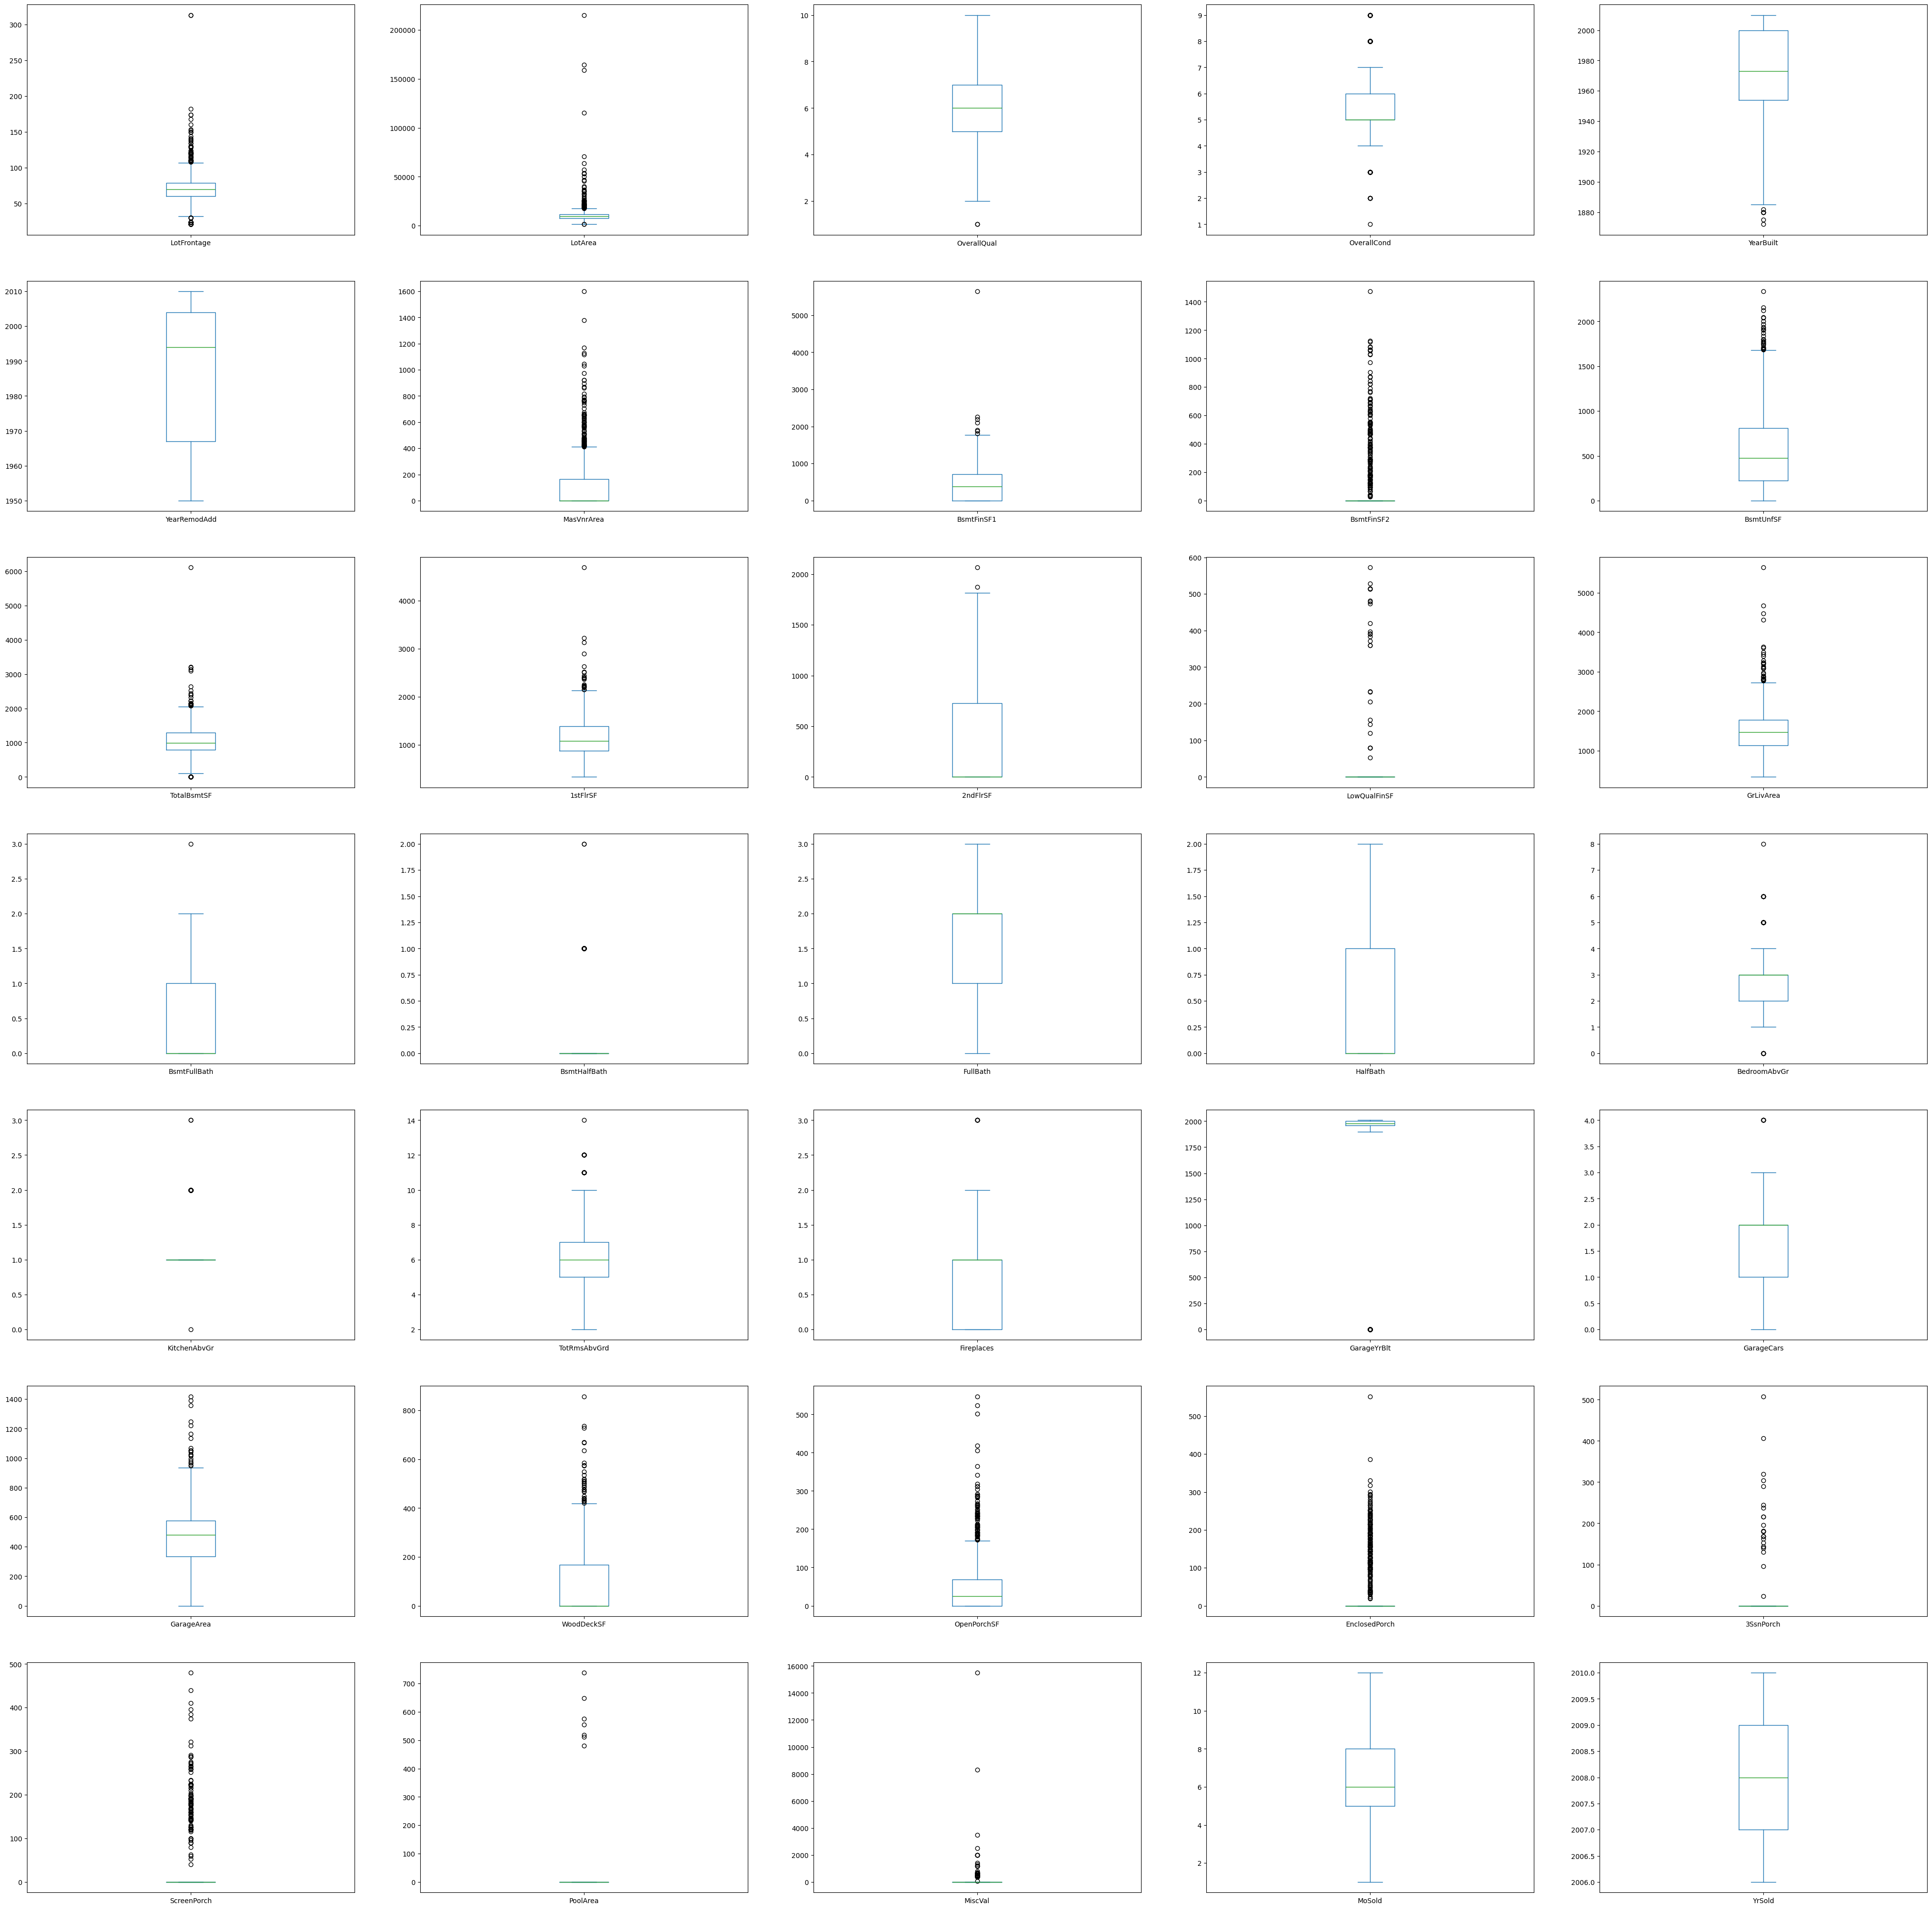

In [826]:
num_data.plot(kind='box',sharex=False,sharey=False,subplots=True,layout=(7,5),figsize=(50,50))
plt.show()

In [855]:
# Upon identifying the outliers using IQR that effect the boxplot visualization, the feature behavior observed is applicable for SalePrices ranging 
# between 60000 and 426000 dollars. Rating based features with unique values such as (Po,Fa,TA,gd,Ex) tend to show a significant correlation with the SalePrice thus indicating the importance of 
# the quality of the attribute that characterize the property

In [59]:
features_based_rating=[]
for i in obj_data.drop(['GarageQual','GarageCond'],axis=1).columns :
    if 'Gd' in obj_data[i].unique():
        features_based_rating.append(i)
# spearman
Spearman_df=data_1[features_based_rating]

In [65]:
Spearman_df_encoded=Spearman_df.copy()
for i in Spearman_df.columns:
    grouped=data_1.groupby(i)['SalePrice'].mean().sort_values().index
    x=(list(grouped))
    map={}
    for j,feature_unique_value in enumerate(x):
        map[feature_unique_value]=j
    Spearman_df_encoded[i]=Spearman_df_encoded[i].map(map)


In [66]:
#SPEARMAN CORRELATION
correlations=[]
p_values=[]
features=[]
from scipy.stats import spearmanr
for feature in Spearman_df_encoded.columns:
    correlation,p_value=spearmanr(Spearman_df_encoded[feature],data_1['SalePrice'])
    correlations.append(correlation)
    p_values.append(p_value)
    features.append(feature)
spearman_corr_df=pd.DataFrame({'Feature':features,'Corr_coef':correlations,'P_values':p_values})

In [67]:
spearman_corr_df

,Feature,Corr_coef,P_values
0,MSSubClass,0.583130,9.583345e-134
1,MSZoning,0.422232,3.364273e-64
2,Street,0.045814,8.012225e-02
3,Alley,0.130207,5.968981e-07
4,LotShape,0.321184,2.188686e-36
5,LandContour,0.154423,3.010003e-09
6,Utilities,0.016710,5.234926e-01
7,LotConfig,0.105029,5.798914e-05
8,LandSlope,0.050310,5.461545e-02
9,Neighborhood,0.755779,2.258361e-270


In [68]:
# ExterQual,BsmtQual and KitchenQual seems to show a strong significnat correlation with the target variable. The extremely low p_values suggests a 
# strong evidence against the null hypothesis(no true correlation betweent he variables). A low probability of observing the computed correelation when
# presuming that the two variables are not correlated strongly suggests a relevant significant correlation between the two variables beyond just random chance.

In [73]:
# identifying other categorical features that that could hold relevant correlation 

# spearman
Spearman_df=obj_data.drop(features_based_rating,axis=1).copy()

Spearman_df_encoded=Spearman_df.copy()
for i in Spearman_df.columns:
    grouped=data_1.groupby(i)['SalePrice'].mean().sort_values().index
    x=(list(grouped))
    map={}
    for j,feature_unique_value in enumerate(x):
        map[feature_unique_value]=j
    Spearman_df_encoded[i]=Spearman_df_encoded[i].map(map)

#SPEARMAN CORRELATION
correlations=[]
p_values=[]
features=[]
nunique=[]
from scipy.stats import spearmanr
for feature in Spearman_df_encoded.columns:
    correlation,p_value=spearmanr(Spearman_df_encoded[feature],data_1['SalePrice'])
    correlations.append(correlation)
    p_values.append(p_value)
    features.append(feature)
    nunique.append(Spearman_df_encoded[feature].nunique())
spearman_corr_df=pd.DataFrame({'Feature':features,'Corr_coef':correlations,'P_values':p_values,'N_unique_Values':nunique})
spearman_corr_df_high_corr=spearman_corr_df[spearman_corr_df['Corr_coef'].abs().ge(0.6)]
spearman_corr_df=spearman_corr_df.drop(index=spearman_corr_df_high_corr.index)
spearman_corr_df_mid_corr=spearman_corr_df[spearman_corr_df['Corr_coef'].abs().ge(0.5)]

In [74]:
spearman_corr_df_high_corr

,Feature,Corr_coef,P_values,N_unique_Values
9,Neighborhood,0.755779,2.258361e-270,25
27,GarageFinish,0.633974,5.937952e-165,4


In [75]:
spearman_corr_df_mid_corr

,Feature,Corr_coef,P_values,N_unique_Values
0,MSSubClass,0.583130,9.583345e-134,15
19,Foundation,0.573580,1.755079e-128,6
26,GarageType,0.598814,8.906579e-143,7


In [76]:
for index,row in spearman_corr_df_high_corr.iterrows():
    print('\nThe feature',row['Feature'],'has a very strong correlation with the target variable with coeff-',np.round(row['Corr_coef'],3),'and a p_value of',row['P_values'])
    print(f'The {row['Feature']} feature has {row['N_unique_Values']} unique categories, indicating a variety of {row['Feature']+'s'} in the dataset that significantly influence house prices.')
    


The feature Neighborhood has a very strong correlation with the target variable with coeff- 0.756 and a p_value of 2.2583605835691218e-270
The Neighborhood feature has 25 unique categories, indicating a variety of Neighborhoods in the dataset that significantly influence house prices.

The feature GarageFinish has a very strong correlation with the target variable with coeff- 0.634 and a p_value of 5.937951878561849e-165
The GarageFinish feature has 4 unique categories, indicating a variety of GarageFinishs in the dataset that significantly influence house prices.


In [77]:
for index,row in spearman_corr_df_mid_corr.iterrows():
    print('\nThe feature',row['Feature'],'has a strong correlation with the target variable with coeff-',np.round(row['Corr_coef'],3),'and a p_value of',row['P_values'])
    print(f'The {row['Feature']} feature has {row['N_unique_Values']} unique categories, indicating a variety of {row['Feature']+'s'} in the dataset that significantly influence house prices.')
    


The feature MSSubClass has a strong correlation with the target variable with coeff- 0.583 and a p_value of 9.58334536410743e-134
The MSSubClass feature has 15 unique categories, indicating a variety of MSSubClasss in the dataset that significantly influence house prices.

The feature Foundation has a strong correlation with the target variable with coeff- 0.574 and a p_value of 1.755078909480378e-128
The Foundation feature has 6 unique categories, indicating a variety of Foundations in the dataset that significantly influence house prices.

The feature GarageType has a strong correlation with the target variable with coeff- 0.599 and a p_value of 8.906579316229093e-143
The GarageType feature has 7 unique categories, indicating a variety of GarageTypes in the dataset that significantly influence house prices.


In [46]:
num_data=num_data.drop('SalePrice',axis=1)

In [47]:
cat_data=obj_data.copy()

In [48]:
data_1.to_csv('Housing_price_preprocessed.csv')

In [49]:
X=data_1.drop('SalePrice',axis=1)
y=np.log(data_1['SalePrice']+1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
#pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
numerical_transformer=Pipeline(steps=[('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('encoder',OneHotEncoder(handle_unknown='ignore'))])
preprocessor_1=ColumnTransformer(transformers=[('num',numerical_transformer,num_data.columns),
                                               ('cat',categorical_transformer,cat_data.columns)
                                            ],remainder='passthrough')
pipeline_1=Pipeline(steps=[('preprocessor_1',preprocessor_1)])

In [51]:
X_train_1=pipeline_1.fit_transform(X_train)
X_test_1=pipeline_1.transform(X_test)

In [52]:
X_train_1_df=pd.DataFrame(X_train_1.toarray(),index=X_train.index,columns=pipeline_1.named_steps['preprocessor_1'].get_feature_names_out())
X_test_1_df=pd.DataFrame(X_test_1.toarray(),index=X_test.index,columns=pipeline_1.named_steps['preprocessor_1'].get_feature_names_out())

In [53]:
# models to test
# linear models- LinearRegression
# tree based - xgb random forest xgb
# other models mlpregressor

In [54]:
from sklearn.model_selection import cross_val_score,KFold
cv=KFold(n_splits=5,shuffle=True,random_state=42)

In [55]:
base_val_mse=[]
base_val_rmse=[]
base_val_mae=[]
base_val_mse_inverse=[]
base_val_rmse_inverse=[]
base_val_mae_inverse=[]
base_val_r2=[]

In [56]:
# base validation--LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lr=LinearRegression()
lr.fit(X_train_1,y_train)
lr_predict=lr.predict(X_test_1)

#print('MSE--',mean_squared_error(y_test,lr_predict))
base_val_mse.append(mean_squared_error(y_test,lr_predict))
#print('RMSE--',np.sqrt(mean_squared_error(y_test,lr_predict)))
base_val_rmse.append(np.sqrt(mean_squared_error(y_test,lr_predict)))
#print('MAE---',mean_absolute_error(y_test,lr_predict))
base_val_mae.append(mean_absolute_error(y_test,lr_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
lr_predict_inverse=np.exp(lr_predict)-1
#print('MSE_inverse--',mean_squared_error(y_test_inverse,lr_predict_inverse))
base_val_mse_inverse.append(mean_squared_error(y_test_inverse,lr_predict_inverse))
#print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,lr_predict_inverse)),2),'$')
base_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,lr_predict_inverse)),2))
#print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,lr_predict_inverse),2),'$')
base_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,lr_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,lr_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,lr_predict_inverse))

R2_score 0.930080435397158


In [57]:
# base validation-RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train_1,y_train)
rf_predict=rf.predict(X_test_1)

#print('MSE--',mean_squared_error(y_test,rf_predict))
base_val_mse.append(mean_squared_error(y_test,rf_predict))
#print('RMSE--',np.sqrt(mean_squared_error(y_test,rf_predict)))
base_val_rmse.append(np.sqrt(mean_squared_error(y_test,rf_predict)))
#print('MAE---',mean_absolute_error(y_test,rf_predict))
base_val_mae.append(mean_absolute_error(y_test,rf_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
rf_predict_inverse=np.exp(rf_predict)-1
#print('MSE_inverse--',mean_squared_error(y_test_inverse,rf_predict_inverse))
base_val_mse_inverse.append(mean_squared_error(y_test_inverse,rf_predict_inverse))
#print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,rf_predict_inverse)),2),'$')
base_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,rf_predict_inverse)),2))
#print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,rf_predict_inverse),2),'$')
base_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,rf_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,rf_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,rf_predict_inverse))


R2_score 0.8919287526570262


In [58]:
# base validation
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
xg=xgb.XGBRegressor()
xg.fit(X_train_1,y_train)
xg_predict=xg.predict(X_test_1)

#print('MSE--',mean_squared_error(y_test,xg_predict))
base_val_mse.append(mean_squared_error(y_test,xg_predict))
#print('RMSE--',np.sqrt(mean_squared_error(y_test,xg_predict)))
base_val_rmse.append(np.sqrt(mean_squared_error(y_test,xg_predict)))
#print('MAE---',mean_absolute_error(y_test,xg_predict))
base_val_mae.append(mean_absolute_error(y_test,xg_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
xg_predict_inverse=np.exp(xg_predict)-1
#print('MSE_inverse--',mean_squared_error(y_test_inverse,xg_predict_inverse))
base_val_mse_inverse.append(mean_squared_error(y_test_inverse,xg_predict_inverse))
#print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,xg_predict_inverse)),2),'$')
base_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,xg_predict_inverse)),2))
#print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,xg_predict_inverse),2),'$')
base_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,xg_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,xg_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,xg_predict_inverse))


R2_score 0.9102906028451417


In [59]:
# base validation-MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mlp=MLPRegressor(max_iter=10000,random_state=42,n_iter_no_change=3,learning_rate_init=0.001)
mlp.fit(X_train_1,y_train)
mlp_predict=mlp.predict(X_test_1)

#print('MSE--',mean_squared_error(y_test,mlp_predict))
base_val_mse.append(mean_squared_error(y_test,mlp_predict))
#print('RMSE--',np.sqrt(mean_squared_error(y_test,mlp_predict)))
base_val_rmse.append(np.sqrt(mean_squared_error(y_test,mlp_predict)))
#print('MAE---',mean_absolute_error(y_test,mlp_predict))
base_val_mae.append(mean_absolute_error(y_test,mlp_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
mlp_predict_inverse=np.exp(mlp_predict)-1
#print('MSE_inverse--',mean_squared_error(y_test_inverse,mlp_predict_inverse))
base_val_mse_inverse.append(mean_squared_error(y_test_inverse,mlp_predict_inverse))
#print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,mlp_predict_inverse)),2),'$')
base_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,mlp_predict_inverse)),2))
#print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,mlp_predict_inverse),2),'$')
base_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,mlp_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,mlp_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,mlp_predict_inverse))


R2_score 0.8360015873796911


In [60]:
models=['Linear_Regression','Random_Forest_Regressor','XGB_Regressor','MLPRegressor']
base_val_df=pd.DataFrame({'Models':models,'base_mse':base_val_mse,'base_val_rmse':base_val_rmse,
                         'base_mae':base_val_mae,'base_mse_inverse':base_val_mse_inverse,'rmse-($)':base_val_rmse_inverse,
                         'mae-($)':base_val_mae_inverse,'base_r2':base_val_r2})
base_val_df 

,Models,base_mse,base_val_rmse,base_mae,base_mse_inverse,rmse-($),mae-($),base_r2
0,Linear_Regression,0.017209,0.131182,0.089815,5.363059e+08,23158.28,15061.21,0.930080
1,Random_Forest_Regressor,0.021490,0.146596,0.099369,8.289417e+08,28791.35,17469.71,0.891929
2,XGB_Regressor,0.021017,0.144971,0.099638,6.881003e+08,26231.67,17367.99,0.910291
3,MLPRegressor,0.029048,0.170435,0.124869,1.257921e+09,35467.19,22592.49,0.836002


In [389]:
# Model Performance Analysis for Housing Price Regression Data

# Performance Metrics:
# - Mean Squared Error (MSE)
# - Root Mean Squared Error (RMSE)
# - Mean Absolute Error (MAE)
# - Inverse MSE (MSE⁻¹)
# - R² Score



# Inferences:

# Linear Regression:
# - R² Score: Approximately 93% of the variance in the target variable is predictable by the Linear Regression model.
# - RMSE: $23,149.57
# - MAE: $15,082.10

# Random Forest Regressor:
# - R² Score: Approximately 88% of the variance in the target variable is predictable by the Random Forest Regressor model.
# - RMSE: $29,307.62
# - MAE: $17,009.18

# XGB Regressor:
# - R² Score: Approximately 91.5% of the variance in the target variable is predictable by the XGB Regressor model.
# - RMSE: $25,459.81
# - MAE: $17,367.99

# MLP Regressor:
# - R² Score: Approximately 86% of the variance in the target variable is predictable by the MLP Regressor model.
# - RMSE: $32189.79
# - MAE: $20,564.59


# Discussion:

# - The Root Mean Squared Error (RMSE) tends to be more inclusive of outliers present in the 
# target value, making it more sensitive to high priced properties that skew the distribution 
# of the target variable. Hence, it is more reliable to choose a model with a low RMSE if the characteristic 
# of the SalePrice includes such outliers.

# - Alternatively, a model with a lower Mean Absolute Error (MAE) can be chosen for predicting average prices 
# due to MAE's slight robustness towards outliers.

# - Based on the metrics, the Linear Regression model is preferable for both high priced properties as 
# well as average priced properties. Its better performance compared to the tree-based models can be attributed 
# to the presence of features that exhibit linearity with the target variable, allowing the model to make valid 
# inferences.

# - The models were run using default hyperparameter configurations. Hyperparameter tuning, 
# dimensionality reduction, or feature engineering could potentially improve the performance of the 
# tree-based models.

# Recommendations:
# - Consider including visualizations such as scatter plots of actual vs. predicted values or distribution 
# plots of residuals to provide a more comprehensive analysis.
# - Mention the potential next steps for improving model performance, such as hyperparameter tuning or 
# feature engineering.
# - Clarify the specific preprocessing technique used and how it might affect the model performance.


In [210]:
gr_val_mse=[]
gr_val_rmse=[]
gr_val_mae=[]
gr_val_mse_inverse=[]
gr_val_rmse_inverse=[]
gr_val_mae_inverse=[]
gr_val_r2=[]

In [217]:
# Hyperparameter tuning the rf model

from sklearn.model_selection import GridSearchCV

params={'n_estimators':[100,200,500],'max_depth':[None,10,30],'min_samples_split':[2,5,10]}


rf_gr=RandomForestRegressor(random_state=42)
rf_gr=GridSearchCV(rf_gr,params,cv=cv,n_jobs=-1,scoring='neg_mean_squared_error')
rf_gr.fit(X_train_1,y_train)

print('The best score obtained by the model throughout the search process was-',np.sqrt(-1*rf_gr.best_score_))
print('The best params-')
print(rf_gr.best_params_)
print('\n--------------------')

rf_predict=rf_gr.predict(X_test_1)

print('MSE--',mean_squared_error(y_test,rf_predict))
gr_val_mse.append(mean_squared_error(y_test,rf_predict))
print('RMSE--',np.sqrt(mean_squared_error(y_test,rf_predict)))
gr_val_rmse.append(np.sqrt(mean_squared_error(y_test,rf_predict)))
print('MAE---',mean_absolute_error(y_test,rf_predict))
gr_val_mae.append(mean_absolute_error(y_test,rf_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
rf_predict_inverse=np.exp(rf_predict)-1
print('MSE_inverse--',mean_squared_error(y_test_inverse,rf_predict_inverse))
gr_val_mse_inverse.append(mean_squared_error(y_test_inverse,rf_predict_inverse))
print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,rf_predict_inverse)),2),'$')
gr_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,rf_predict_inverse)),2))
print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,rf_predict_inverse),2),'$')
gr_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,rf_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,rf_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,rf_predict_inverse))

The best score obtained by the model throughout the search process was- 0.14867209187825184
The best params-
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}

--------------------
MSE-- 0.021504793574415922
RMSE-- 0.14664512802822985
MAE--- 0.0980405649346518
MSE_inverse-- 902775093.2945997
RMSE_inverse-- 30046.22 $
MAE_inverse--- 17480.21 $
R2_score 0.8823029074762563


In [350]:
# random forest hyperparameter optimization
from hyperopt import tpe,hp,fmin,Trials,STATUS_OK

space={
    'n_estimators':hp.quniform('n_estimators',100,300,10),
    'max_depth':hp.quniform('max_depth',1,18,1),
    'min_samples_split':hp.quniform('min_sample_split',2,15,1)
      }

def objective_fn(params):
    params['n_estimators']=int(params['n_estimators'])
    params['max_depth']=int(params['max_depth'])
    params['min_samples_split']=int(params['min_samples_split'])

    model=RandomForestRegressor(random_state=42,**params)
    model.fit(X_train_1,y_train)
    y_predict=model.predict(X_test_1)
    y_predict_inverse=np.exp(y_predict)-1
    y_test_inverse=np.exp(y_test)-1
    score=np.sqrt(mean_squared_error(y_test_inverse,y_predict_inverse))

    return {'loss':score,'status':STATUS_OK}

trials=Trials()
best=fmin(fn=objective_fn,space=space,algo=tpe.suggest,trials=trials,rstate=np.random.default_rng(42),max_evals=100)
print("Best hyperparameters:", best)

100%|██████████████████████████████████████████████| 100/100 [37:54<00:00, 22.74s/trial, best loss: 29067.353676275532]
Best hyperparameters: {'max_depth': 17.0, 'min_sample_split': 3.0, 'n_estimators': 110.0}


In [353]:
# xgb forest hyperparameter optimization
from hyperopt import tpe,hp,fmin,Trials,STATUS_OK
import xgboost as xgb

space = {
    'n_estimators': hp.quniform('n_estimators', 200, 1000, 40),
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 20, 1),
    'min_child_samples': hp.uniform('min_child_samples', 0, 50),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.0, 1),
    'subsample': hp.uniform('subsample', 0.0, 1),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),   # L1 regularization
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'learning_rate':hp.uniform('learning_rate',0.01,0.2),
    'min_data_in_leaf': hp.quniform('min_data_in_leaf', 10, 50, 1)
}

def objective_fn(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])
    params['min_child_weight'] = int(params['min_child_weight'])
    params['min_data_in_leaf'] = int(params['min_data_in_leaf'])

    model=xgb.XGBRegressor(random_state=42,objective='reg:squarederror',verbosity=0,**params)
    model.fit(X_train_1,y_train)

    y_predict=model.predict(X_test_1)
    y_predict_inverse=np.exp(y_predict)-1
    y_test_inverse=np.exp(y_test)-1
    score=np.sqrt(mean_squared_error(y_test_inverse,y_predict_inverse))

    return {'loss':score,'status':STATUS_OK}

trials=Trials()
best=fmin(fn=objective_fn,space=space,algo=tpe.suggest,trials=trials,rstate=np.random.default_rng(42),max_evals=100)
print("Best hyperparameters:", best)

100%|██████████████████████████████████████████████| 100/100 [03:50<00:00,  2.31s/trial, best loss: 23185.052975838902]
Best hyperparameters: {'colsample_bytree': 0.6260430604459659, 'learning_rate': 0.09572173734359334, 'max_depth': 10.0, 'min_child_samples': 27.99143213895102, 'min_child_weight': 5.0, 'min_data_in_leaf': 37.0, 'n_estimators': 760.0, 'reg_alpha': 0.09122437272626951, 'reg_lambda': 0.07357846254168016, 'subsample': 0.8776153090507742}


In [ ]:
## from hyperopt import tpe, hp, fmin, Trials, STATUS_OK
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the search space
space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 100)]),
    'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
    'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
    'alpha': hp.uniform('alpha', 0.0001, 0.1),
    'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    'learning_rate_init': hp.uniform('learning_rate_init', 0.0001, 0.1),
}

# Objective function to minimize
def objective_fn(params):
    model = MLPRegressor(
        max_iter=10000,
        random_state=42,
        n_iter_no_change=3,
        **params
    )
    try:
        model.fit(X_train_1, y_train)
        y_predict = model.predict(X_test_1)
    except ValueError as e:
        # Return a high loss if the model fails to fit
        print(f"Error during model fitting: {e}")
        return {'loss': np.inf, 'status': STATUS_OK}
    
    # Predict on the test set and apply inverse transformation
    y_predict_inverse = np.exp(y_predict) - 1
    y_test_inverse = np.exp(y_test) - 1
    
    # Calculate the root mean squared error (RMSE)
    score = np.sqrt(mean_squared_error(y_test_inverse, y_predict_inverse))
    
    # Check for non-finite values
    if not np.isfinite(score):
        return {'loss': np.inf, 'status': STATUS_OK}
    
    return {'loss': score, 'status': STATUS_OK}

# Run hyperparameter optimization
trials = Trials()
best = fmin(
    fn=objective_fn,
    space=space,
    algo=tpe.suggest,
    trials=trials,
    rstate=np.random.default_rng(42),
    max_evals=100
)

print("Best hyperparameters:", best)


In [540]:
from hyperopt import tpe, hp, fmin, Trials, STATUS_OK
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the search space
space = {
    'hidden_layer_sizes': hp.choice('hidden_layer_sizes', [(50,), (75,), (100,), (50, 50), (75, 75), (100, 100)]),
    'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
    'solver': hp.choice('solver', ['lbfgs', 'adam']),  # 'sgd' is often less stable for MLPRegressor
    'alpha': hp.loguniform('alpha', -4, -1),  # Narrowed range for regularization
    'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    'learning_rate_init': hp.loguniform('learning_rate_init', -4, -1),  # Narrowed range for learning rate
}

# Objective function to minimize
def objective_fn(params):
    model = MLPRegressor(
        max_iter=10000,
        random_state=42,
        n_iter_no_change=3,
        **params
    )
    
    error_score = np.inf
    
    try:
        model.fit(X_train_1, y_train)
        y_predict = model.predict(X_test_1)
        y_predict_inverse = np.exp(y_predict) - 1
        y_test_inverse = np.exp(y_test) - 1
        score = np.sqrt(mean_squared_error(y_test_inverse, y_predict_inverse))
        
        # Check for non-finite values
        if not np.isfinite(score):
            score = error_score
    except ValueError as e:
        # Print the error and set the score to a high loss value
        print(f"Error during processing: {e}")
        score = error_score

    return {'loss': score, 'status': STATUS_OK}

# Run hyperparameter optimization
trials = Trials()
best = fmin(
    fn=objective_fn,
    space=space,
    algo=tpe.suggest,
    trials=trials,
    rstate=np.random.default_rng(42),
    max_evals=100
)

print("Best hyperparameters:", best)


100%|██████████████████████████████████████████████| 100/100 [31:59<00:00, 19.19s/trial, best loss: 23031.589886979196]
Best hyperparameters: {'activation': 0, 'alpha': 0.14450738205161492, 'hidden_layer_sizes': 4, 'learning_rate': 1, 'learning_rate_init': 0.11099709410797982, 'solver': 0}


In [358]:
from hyperopt import hp, tpe, fmin, Trials
from hyperopt.pyll.base import scope

# Define the hyperparameter space with refined ranges
space = {
    'hidden_layer_sizes': scope.int(hp.quniform('hidden_layer_sizes', 10, 100, 1)),  # Smaller range for hidden layers
    'activation': hp.choice('activation', ['identity', 'logistic', 'tanh', 'relu']),
    'alpha': hp.loguniform('alpha', -5, 0),  # Alpha in range (e^-5, 1)
    'solver': hp.choice('solver', ['lbfgs', 'sgd', 'adam']),
    'learning_rate': hp.choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
    'learning_rate_init': hp.loguniform('learning_rate_init', -5, -1),  # Learning rate in range (e^-5, e^-1)
}

# Objective function for Hyperopt with error handling
def objective(params):
    # Map activation and solver indices to their actual values
    activation = params['activation']
    solver = params['solver']
    learning_rate = params['learning_rate']

    model = MLPRegressor(
        hidden_layer_sizes=(params['hidden_layer_sizes'],),
        activation=activation,
        alpha=params['alpha'],
        solver=solver,
        learning_rate=learning_rate,
        learning_rate_init=params['learning_rate_init'],
        max_iter=10000,
        random_state=42
    )

    try:
        model.fit(X_train_1, y_train)
        y_pred = model.predict(X_test_1)
        y_pred_inverse = np.exp(y_pred) - 1
        y_test_inverse = np.exp(y_test) - 1
        loss = np.sqrt(mean_squared_error(y_test_inverse, y_pred_inverse))
        return loss
        # Predict on the test set and apply inverse transformation
        y_predict_inverse = np.exp(y_predict) - 1
        y_test_inverse = np.exp(y_test) - 1
        
        # Calculate the root mean squared error (RMSE)
        score = np.sqrt(mean_squared_error(y_test_inverse, y_predict_inverse))
        return score
    except Exception as e:
        return np.inf  # Assign a high loss if an error occurs

# Perform the hyperparameter optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best hyperparameters:", best)


  4%|█▉                                              | 4/100 [01:01<19:24, 12.13s/trial, best loss: 23981.004832620758]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:183: RuntimeWarning: invalid value encountered in subtract
  self.momentum * velocity - self.learning_rate * grad



  5%|██▎                                           | 5/100 [04:53<2:24:51, 91.49s/trial, best loss: 23981.004832620758]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



 13%|██████▏                                         | 13/100 [06:24<26:11, 18.07s/trial, best loss: 23440.53387042273]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:183: RuntimeWarning: invalid value encountered in subtract
  self.momentum * velocity - self.learning_rate * grad



 14%|██████▋                                         | 14/100 [07:57<58:25, 40.77s/trial, best loss: 23440.53387042273]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



 15%|███████▏                                        | 15/100 [08:10<45:54, 32.41s/trial, best loss: 23440.53387042273]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



 16%|███████▎                                      | 16/100 [09:34<1:07:02, 47.88s/trial, best loss: 23440.53387042273]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



 46%|██████████████████████                          | 46/100 [18:56<18:19, 20.36s/trial, best loss: 23148.76110066557]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:183: RuntimeWarning: invalid value encountered in subtract
  self.momentum * velocity - self.learning_rate * grad



 47%|█████████████████████▌                        | 47/100 [22:07<1:03:12, 71.56s/trial, best loss: 23148.76110066557]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



 55%|██████████████████████████▍                     | 55/100 [23:47<10:33, 14.08s/trial, best loss: 23148.76110066557]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:183: RuntimeWarning: invalid value encountered in subtract
  self.momentum * velocity - self.learning_rate * grad



 56%|██████████████████████████▉                     | 56/100 [26:19<40:38, 55.42s/trial, best loss: 23148.76110066557]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



 76%|███████████████████████████████████▋           | 76/100 [30:12<06:01, 15.08s/trial, best loss: 23025.105237204658]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:183: RuntimeWarning: invalid value encountered in subtract
  self.momentum * velocity - self.learning_rate * grad



 77%|████████████████████████████████████▏          | 77/100 [34:16<32:01, 83.55s/trial, best loss: 23025.105237204658]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



 82%|██████████████████████████████████████▌        | 82/100 [35:31<07:58, 26.58s/trial, best loss: 23025.105237204658]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_stochastic_optimizers.py:183: RuntimeWarning: invalid value encountered in subtract
  self.momentum * velocity - self.learning_rate * grad



 83%|███████████████████████████████████████        | 83/100 [39:06<23:33, 83.16s/trial, best loss: 23025.105237204658]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



 99%|██████████████████████████████████████████████▌| 99/100 [43:22<00:15, 15.59s/trial, best loss: 23025.105237204658]

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_base.py:172: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: overflow encountered in matmul
  ret = a @ b

C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:205: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b



100%|██████████████████████████████████████████████| 100/100 [44:58<00:00, 26.99s/trial, best loss: 23025.105237204658]
Best hyperparameters: {'activation': 0, 'alpha': 0.3970553288095238, 'hidden_layer_sizes': 58.0, 'learning_rate': 1, 'learning_rate_init': 0.03600547856112189, 'solver': 0}


C:\Users\BHARATH.V.P\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(



In [487]:
rf_tuned_hp={'max_depth': 17, 'min_samples_split': 3, 'n_estimators': 110}
xgb_tuned_hp={'colsample_bytree': 0.6260430604459659, 'learning_rate': 0.09572173734359334, 'max_depth': 10,
             'min_child_weight': 5, 'n_estimators': 760,
              'reg_alpha': 0.09122437272626951, 'reg_lambda': 0.07357846254168016, 'subsample': 0.8776153090507742}
                
mlp_tuned_hp={'activation': 'identity', 'alpha': 0.3970553288095238, 'hidden_layer_sizes': 58, 
              'learning_rate': 'constant', 'learning_rate_init': 0.03600547856112189, 'solver':'lbfgs','n_iter_no_change':3,'max_iter':10000}

In [488]:
model_tuned_hp=[('RandomForestRegressor',RandomForestRegressor,rf_tuned_hp),
               ('XGBRegressor',xgb.XGBRegressor,xgb_tuned_hp),
               ('MLPRegressor',MLPRegressor,mlp_tuned_hp)]

In [495]:
# Hyperparameter tuning the mlp model

mse=[]
rmse=[]
mae=[]
mse_inverse=[]
rmse_inverse=[]
mae_inverse=[]
r2=[]
feature_imp={}
for element in model_tuned_hp:

    model=element[1](random_state=42,**element[2])
    model.fit(X_train_1_df,y_train)
    perm_imps=permutation_importance(model,X_train_1_df,y_train,n_repeats=10,random_state=42)
    perm_imp=perm_imps.importances_mean
    feature_imp[element[0]]=perm_imp
    
    y_predict=model.predict(X_test_1_df)
    
    mse.append(mean_squared_error(y_test,y_predict))
    rmse.append(np.sqrt(mean_squared_error(y_test,y_predict)))
    mae.append(mean_absolute_error(y_test,y_predict))
    
    
    # predicting metrics based on actual scale
    
    y_test_inverse=np.exp(y_test)-1
    y_predict_inverse=np.exp(y_predict)-1
    mse_inverse.append(mean_squared_error(y_test_inverse,y_predict_inverse))
    rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,y_predict_inverse)),2))
    mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,y_predict_inverse),2))
    r2.append(r2_score(y_test_inverse,y_predict_inverse))


In [496]:
models=['Random_Forest_Regressor_tuned','XGB_Regressor_tuned','MLPRegressor_tuned']
tuned_df=pd.DataFrame({'Models':models,'mse':mse,'val_rmse':rmse,
                        'mae':mae,'mse_inverse':mse_inverse,'rmse-($)':rmse_inverse,
                         'mae-($)':mae_inverse,'gr_r2':r2})
tuned_df

,Models,mse,val_rmse,mae,mse_inverse,rmse-($),mae-($),gr_r2
0,Random_Forest_Regressor_tuned,0.021863,0.147863,0.097896,8.916001e+08,29859.67,17373.43,0.883760
1,XGB_Regressor_tuned,0.019765,0.140589,0.093013,8.080508e+08,28426.23,16432.65,0.894652
2,MLPRegressor_tuned,0.016535,0.128587,0.091750,5.293362e+08,23007.31,15549.03,0.930989


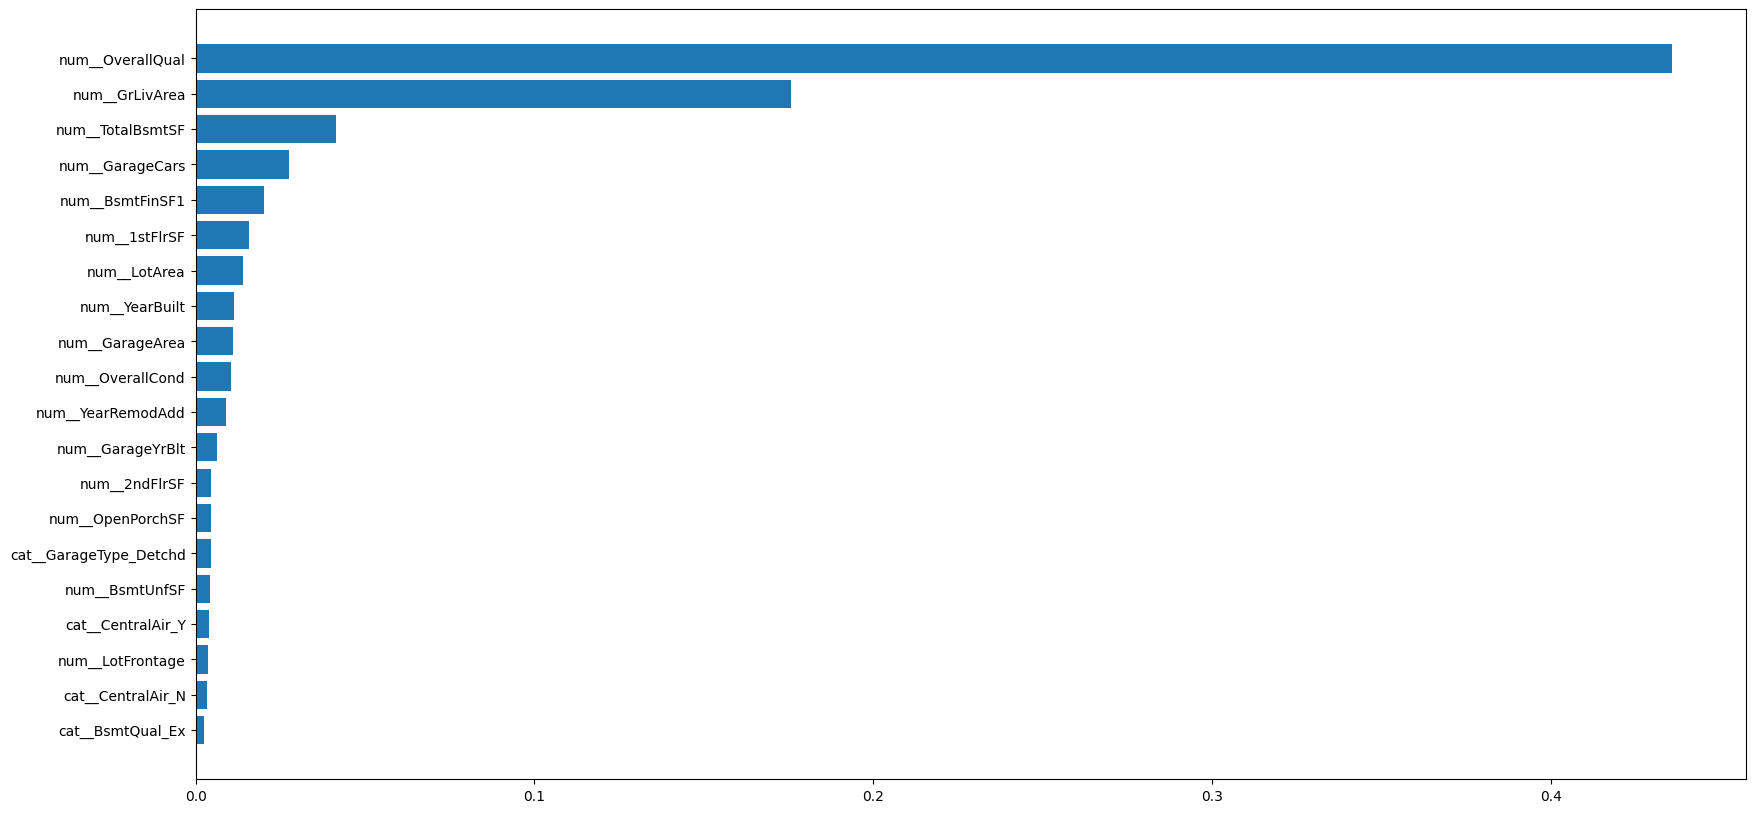

In [449]:
import matplotlib.pyplot as plt
imp=feature_imp['RandomForestRegressor']
imp_df=pd.DataFrame({'Features':pipeline_1.named_steps['preprocessor_1'].get_feature_names_out(),'Imp':imp})
imp_df=imp_df.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(20,10))
plt.barh(imp_df['Features'][:20],imp_df['Imp'][:20])
plt.gca().invert_yaxis()
plt.show()

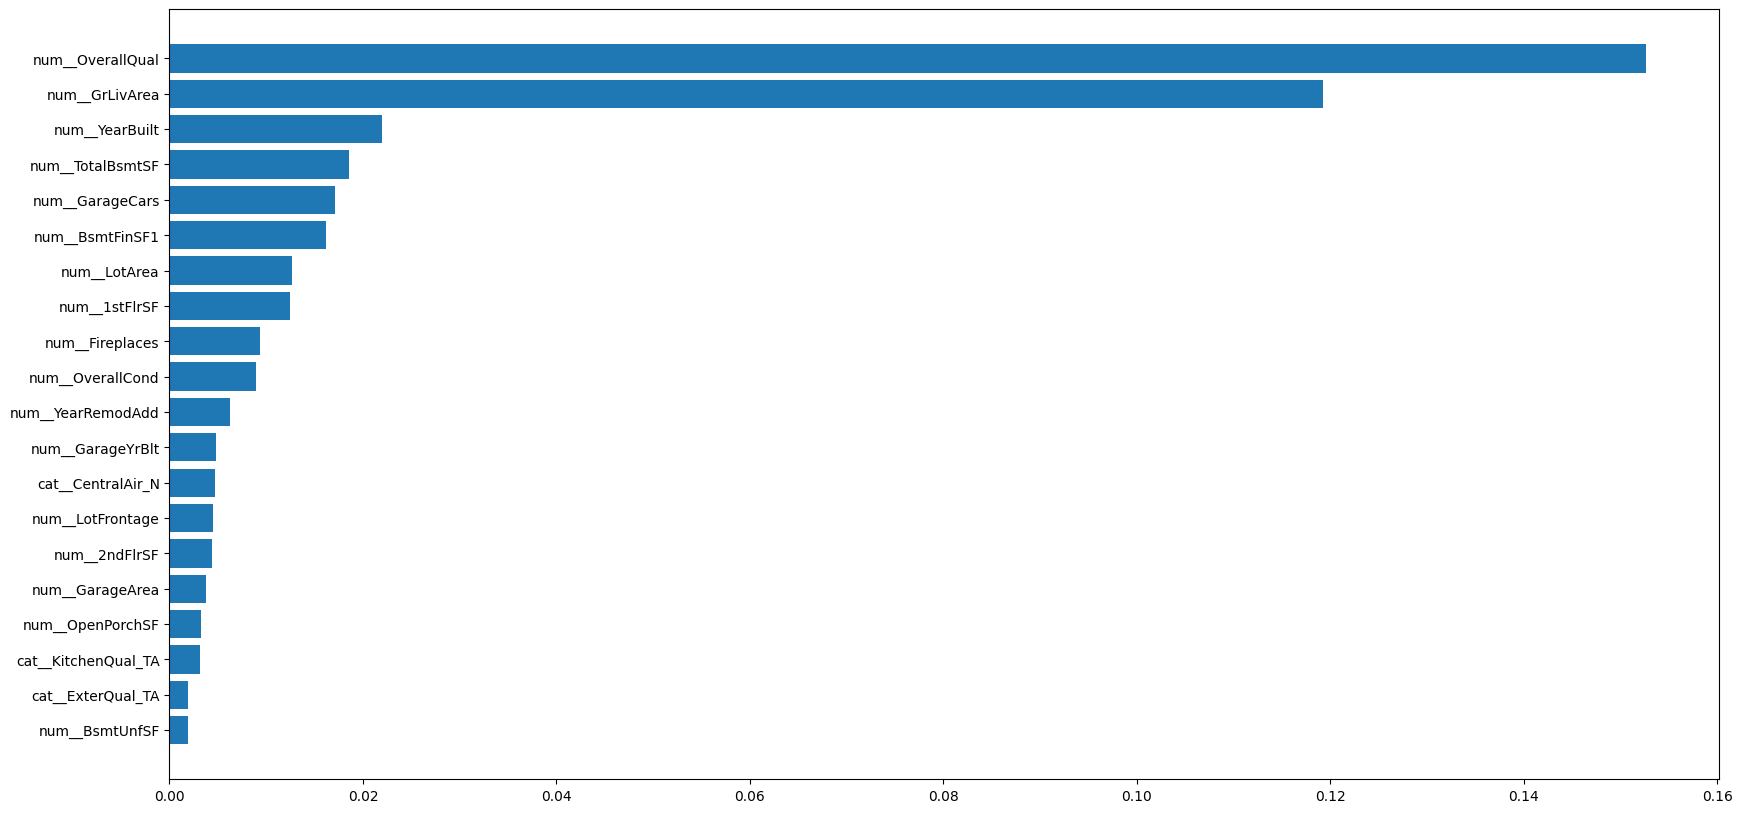

In [450]:
import matplotlib.pyplot as plt
imp=feature_imp['XGBRegressor']
imp_df=pd.DataFrame({'Features':pipeline_1.named_steps['preprocessor_1'].get_feature_names_out(),'Imp':imp})
imp_df=imp_df.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(20,10))
plt.barh(imp_df['Features'][:20],imp_df['Imp'][:20])
plt.gca().invert_yaxis()
plt.show()

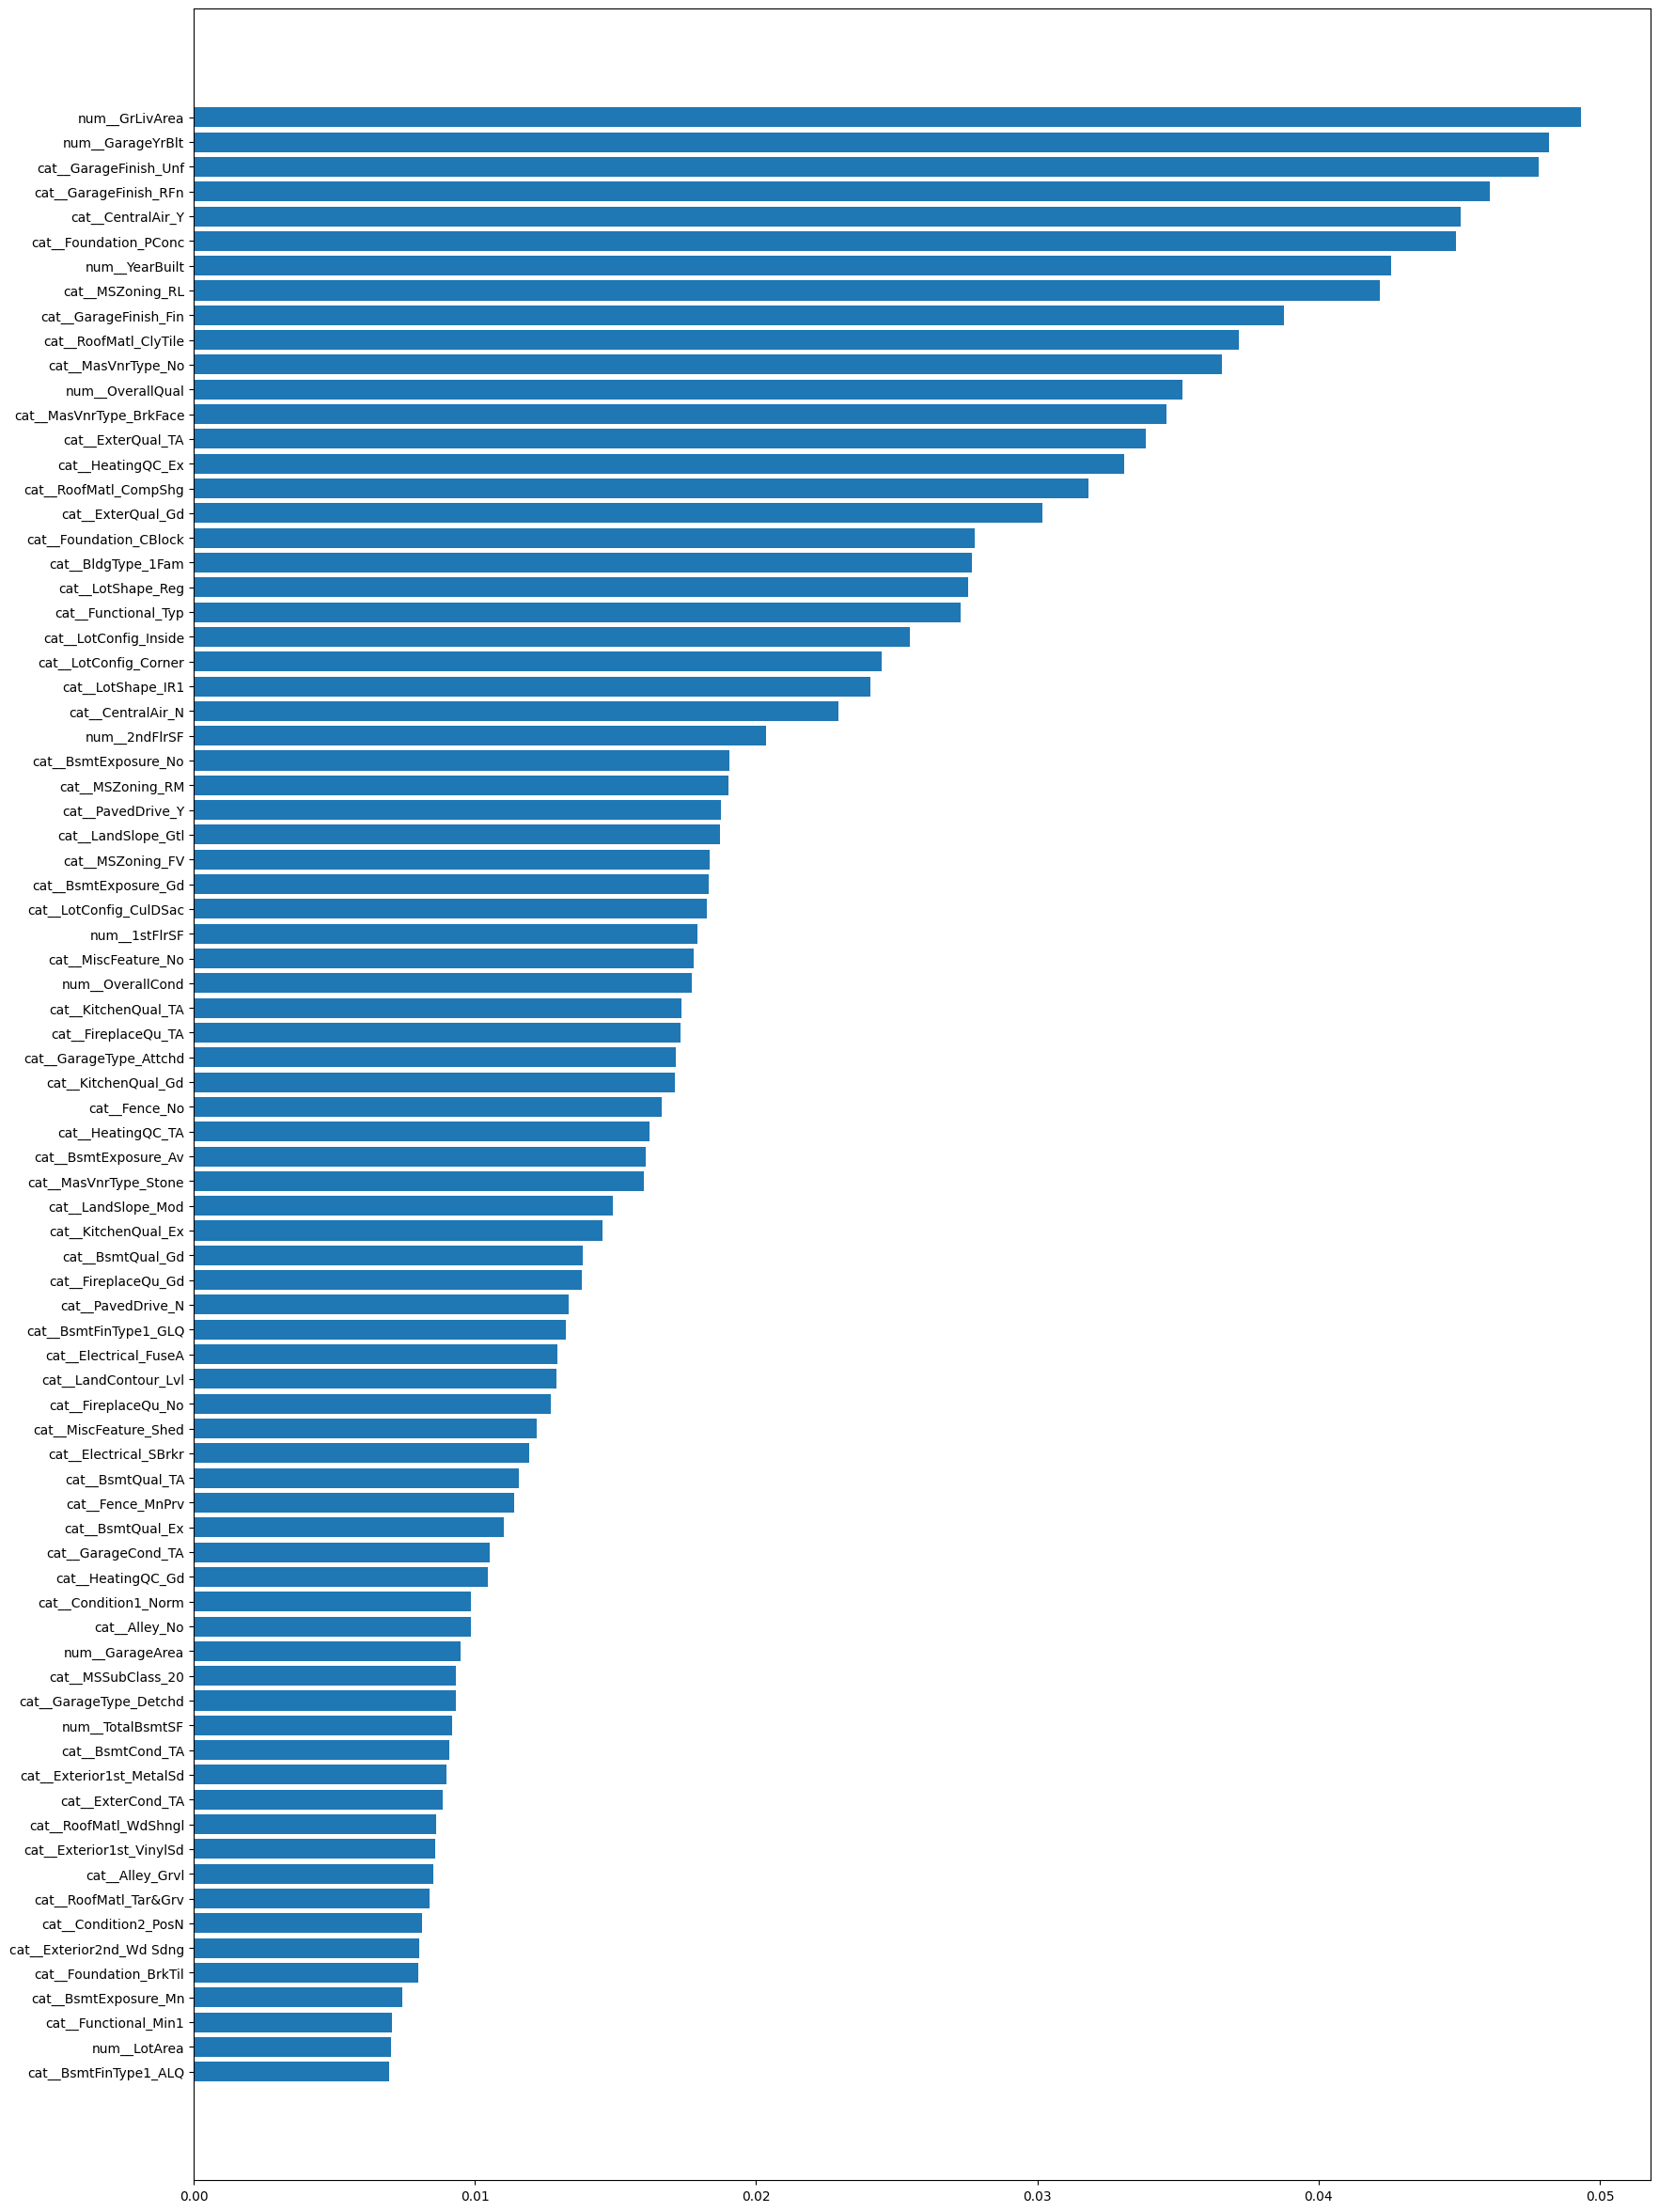

In [458]:
import matplotlib.pyplot as plt
imp=feature_imp['MLPRegressor']
imp_df=pd.DataFrame({'Features':pipeline_1.named_steps['preprocessor_1'].get_feature_names_out(),'Imp':imp})
imp_df=imp_df.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(20,30))
plt.barh(imp_df['Features'][:80],imp_df['Imp'][:80])
plt.gca().invert_yaxis()
plt.show()

In [476]:
# performing fe and preprocessing based on type of data involved 

# convert to categorical
# OverallCond
# GarageYrBlt
# YrSold
# MoSold
# MiscVal
# add new features that represent the sum of related nuemricla features
# reduce dimensionality by using target encoding on all categorical features
# alternatively use ordnial and label encoding as needed
# A linear well established linear model already exist with a r2 score of 93 % so the purpose of fe and above changes would be to improve the xgba nd mlp
# models

In [477]:
data_1['OverallCond']=data_1['OverallCond'].astype('str')
data_1['GarageYrBlt']=data_1['GarageYrBlt'].astype('str')
data_1['YrSold']=data_1['YrSold'].astype('str')
data_1['MoSold']=data_1['MoSold'].astype('str')
data_1['MiscVal']=data_1['MiscVal'].astype('str')

In [478]:
data_1['TotalSF'] = data_1['TotalBsmtSF'] + data_1['1stFlrSF'] + data_1['2ndFlrSF']
data_1['TotalBath'] = data_1['FullBath'] + 0.5 * data_1['HalfBath'] + data_1['BsmtFullBath'] + 0.5 *data_1['BsmtHalfBath']
data_1['Wlk_Around_Area']=data_1[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch']].sum(axis=1)

In [204]:
data_1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [479]:
# indicator columns
data_1['Has_Garage']=(data_1['GarageArea']!=0).astype('str')

In [485]:
# preprocessing the feature engineered dataset

from sklearn.preprocessing import StandardScaler
from category_encoders import TargetEncoder
from sklearn.model_selection import train_test_split

cat_data=data_1.select_dtypes(include='object')
num_data=data_1.drop(cat_data.columns,axis=1)
num_data=num_data.drop('SalePrice',axis=1)

X=data_1.drop('SalePrice',axis=1)
y=np.log(data_1['SalePrice']+1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

numerical_transformer=Pipeline(steps=[('scaler',StandardScaler())])
categorical_transformer=Pipeline(steps=[('encoder',OneHotEncoder(handle_unknown='ignore'))])
preprocessor_2=ColumnTransformer(transformers=[('num',numerical_transformer,num_data.columns),
                                               ('cat',categorical_transformer,cat_data.columns)
                                            ],remainder='passthrough')
pipeline_2=Pipeline(steps=[('preprocessor_2',preprocessor_2)])
X_train_2=pipeline_2.fit_transform(X_train)
X_test_2=pipeline_2.transform(X_test)
X_train_2_df=pd.DataFrame(X_train_2.toarray(),index=X_train.index,columns=pipeline_2.named_steps['preprocessor_2'].get_feature_names_out())
X_test_2_df=pd.DataFrame(X_test_2.toarray(),index=X_test.index,columns=pipeline_2.named_steps['preprocessor_2'].get_feature_names_out())

In [486]:
base_val_mse=[]
base_val_rmse=[]
base_val_mae=[]
base_val_mse_inverse=[]
base_val_rmse_inverse=[]
base_val_mae_inverse=[]
base_val_r2=[]
# base validation-RandomForestRegressore
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
rf=RandomForestRegressor(random_state=42)
rf.fit(X_train_2,y_train)
rf_predict=rf.predict(X_test_2)

#print('MSE--',mean_squared_error(y_test,rf_predict))
base_val_mse.append(mean_squared_error(y_test,rf_predict))
#print('RMSE--',np.sqrt(mean_squared_error(y_test,rf_predict)))
base_val_rmse.append(np.sqrt(mean_squared_error(y_test,rf_predict)))
#print('MAE---',mean_absolute_error(y_test,rf_predict))
base_val_mae.append(mean_absolute_error(y_test,rf_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
rf_predict_inverse=np.exp(rf_predict)-1
#print('MSE_inverse--',mean_squared_error(y_test_inverse,rf_predict_inverse))
base_val_mse_inverse.append(mean_squared_error(y_test_inverse,rf_predict_inverse))
#print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,rf_predict_inverse)),2),'$')
base_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,rf_predict_inverse)),2))
#print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,rf_predict_inverse),2),'$')
base_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,rf_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,rf_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,rf_predict_inverse))

# base validation
import xgboost as xgb
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
xg=xgb.XGBRegressor()
xg.fit(X_train_2,y_train)
xg_predict=xg.predict(X_test_2)

#print('MSE--',mean_squared_error(y_test,xg_predict))
base_val_mse.append(mean_squared_error(y_test,xg_predict))
#print('RMSE--',np.sqrt(mean_squared_error(y_test,xg_predict)))
base_val_rmse.append(np.sqrt(mean_squared_error(y_test,xg_predict)))
#print('MAE---',mean_absolute_error(y_test,xg_predict))
base_val_mae.append(mean_absolute_error(y_test,xg_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
xg_predict_inverse=np.exp(xg_predict)-1
#print('MSE_inverse--',mean_squared_error(y_test_inverse,xg_predict_inverse))
base_val_mse_inverse.append(mean_squared_error(y_test_inverse,xg_predict_inverse))
#print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,xg_predict_inverse)),2),'$')
base_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,xg_predict_inverse)),2))
#print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,xg_predict_inverse),2),'$')
base_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,xg_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,xg_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,xg_predict_inverse))

# base validation-MLPRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mlp=MLPRegressor(max_iter=10000,random_state=42,n_iter_no_change=3,learning_rate_init=0.001)
mlp.fit(X_train_2,y_train)
mlp_predict=mlp.predict(X_test_2)

#print('MSE--',mean_squared_error(y_test,mlp_predict))
base_val_mse.append(mean_squared_error(y_test,mlp_predict))
#print('RMSE--',np.sqrt(mean_squared_error(y_test,mlp_predict)))
base_val_rmse.append(np.sqrt(mean_squared_error(y_test,mlp_predict)))
#print('MAE---',mean_absolute_error(y_test,mlp_predict))
base_val_mae.append(mean_absolute_error(y_test,mlp_predict))


# predicting metrics based on actual scale

y_test_inverse=np.exp(y_test)-1
mlp_predict_inverse=np.exp(mlp_predict)-1
#print('MSE_inverse--',mean_squared_error(y_test_inverse,mlp_predict_inverse))
base_val_mse_inverse.append(mean_squared_error(y_test_inverse,mlp_predict_inverse))
#print('RMSE_inverse--',np.round(np.sqrt(mean_squared_error(y_test_inverse,mlp_predict_inverse)),2),'$')
base_val_rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,mlp_predict_inverse)),2))
#print('MAE_inverse---',np.round(mean_absolute_error(y_test_inverse,mlp_predict_inverse),2),'$')
base_val_mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,mlp_predict_inverse),2))


print('R2_score',r2_score(y_test_inverse,mlp_predict_inverse))
base_val_r2.append(r2_score(y_test_inverse,mlp_predict_inverse))

models=['Random_Forest_Regressor','XGB_Regressor','MLPRegressor']
base_val_df=pd.DataFrame({'Models':models,'base_mse':base_val_mse,'base_val_rmse':base_val_rmse,
                         'base_mae':base_val_mae,'base_mse_inverse':base_val_mse_inverse,'rmse-($)':base_val_rmse_inverse,
                         'mae-($)':base_val_mae_inverse,'base_r2':base_val_r2})
base_val_df 

R2_score 0.8793079625180775
R2_score 0.9001368946742365
R2_score 0.8802709638894892


,Models,base_mse,base_val_rmse,base_mae,base_mse_inverse,rmse-($),mae-($),base_r2
0,Random_Forest_Regressor,0.021933,0.148097,0.098270,9.257473e+08,30426.10,17522.78,0.879308
1,XGB_Regressor,0.021970,0.148224,0.098200,7.659826e+08,27676.39,17223.00,0.900137
2,MLPRegressor,0.025420,0.159436,0.118454,9.183608e+08,30304.47,20811.16,0.880271


In [489]:
# Running feature engineered dataset using tuned hyperparameter

mse=[]
rmse=[]
mae=[]
mse_inverse=[]
rmse_inverse=[]
mae_inverse=[]
r2=[]
feature_imp={}
for element in model_tuned_hp:

    model=element[1](random_state=42,**element[2])
    model.fit(X_train_2_df,y_train)
    perm_imps=permutation_importance(model,X_train_2_df,y_train,n_repeats=10,random_state=42)
    perm_imp=perm_imps.importances_mean
    feature_imp[element[0]]=perm_imp
    
    y_predict=model.predict(X_test_2_df)
    
    mse.append(mean_squared_error(y_test,y_predict))
    rmse.append(np.sqrt(mean_squared_error(y_test,y_predict)))
    mae.append(mean_absolute_error(y_test,y_predict))
    
    
    # predicting metrics based on actual scale
    
    y_test_inverse=np.exp(y_test)-1
    y_predict_inverse=np.exp(y_predict)-1
    mse_inverse.append(mean_squared_error(y_test_inverse,y_predict_inverse))
    rmse_inverse.append(np.round(np.sqrt(mean_squared_error(y_test_inverse,y_predict_inverse)),2))
    mae_inverse.append(np.round(mean_absolute_error(y_test_inverse,y_predict_inverse),2))
    r2.append(r2_score(y_test_inverse,y_predict_inverse))


In [490]:
models=['Random_Forest_Regressor_tuned','XGB_Regressor_tuned','MLPRegressor_tuned']
tuned_df=pd.DataFrame({'Models':models,'mse':mse,'val_rmse':rmse,
                        'mae':mae,'mse_inverse':mse_inverse,'rmse-($)':rmse_inverse,
                         'mae-($)':mae_inverse,'gr_r2':r2})
tuned_df

,Models,mse,val_rmse,mae,mse_inverse,rmse-($),mae-($),gr_r2
0,Random_Forest_Regressor_tuned,0.021863,0.147863,0.097896,8.916001e+08,29859.67,17373.43,0.883760
1,XGB_Regressor_tuned,0.019765,0.140589,0.093013,8.080508e+08,28426.23,16432.65,0.894652
2,MLPRegressor_tuned,0.016535,0.128587,0.091750,5.293362e+08,23007.31,15549.03,0.930989


In [325]:
# BASED ON MODEL EVAL
#xGB AND LINEAR REGRESSION MODELS TEND TO PERFORM WELL
# ENSEMBLING USING STACKINGREGRESSOR COULD YIELD POTENTIALLY GOOD RESULTS


In [ ]:
# META STACKING REGRESSOR

from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv=KFold(n_splits=3,shuffle=True,random_state=42)

meta_estimators=[('RandomForestRegressor',RandomForestRegressor(random_state=42)),
                  ('XGBRegressor',xgb.XGBRegressor(random_state=42)),
                   ('MLPRegressor',MLPRegressor(random_state=42,n_iter_no_change=3))
                  ]
best_estimators=[('RandomForestRegressor',RandomForestRegressor(random_state=42,**rf_tuned_hp)),
                  ('XGBRegressor',xgb.XGBRegressor(random_state=42,**xgb_tuned_hp)),
                   ('MLPRegressor',MLPRegressor(random_state=42,**mlp_tuned_hp))
                  ]
meta_params={'RandomForestRegressor':{'final_estimator__n_estimators':[100, 110, 120],'final_estimator__min_samples_split':[2, 3, 4],'final_estimator__max_depth':[15, 17, 19]},
            'XGBRegressor':{'final_estimator__colsample_bytree': [0.60, 0.63, 0.65],
            'final_estimator__learning_rate': [0.09, 0.095, 0.10],
            'final_estimator__max_depth': [8, 10, 12],
            'final_estimator__min_child_weight': [4, 5, 6],
            'final_estimator__n_estimators': [750, 760, 770],
            'final_estimator__reg_alpha': [0.08, 0.09, 0.10],
            'final_estimator__reg_lambda': [0.07, 0.073, 0.08],
            'final_estimator__subsample': [0.85, 0.88, 0.90]},
            'MLPRegressor':{'final_estimator__activation': ['identity'],
            'final_estimator__alpha': [0.35, 0.40, 0.45],
            'final_estimator__hidden_layer_sizes': [(50,), (58,), (65,)],
            'final_estimator__learning_rate': ['constant'],
            'final_estimator__learning_rate_init': [0.03, 0.036, 0.04],
            'final_estimator__solver': ['lbfgs'],
            'final_estimator__n_iter_no_change': [2, 3, 4],
            'final_estimator__max_iter': [9000, 10000, 11000]}}
tuned_params={}
best_rmse=float('inf')
best_params=None
best_final_estimator=None

for i,element in enumerate(meta_estimators):

    temp_best_estimators=best_estimators.copy()
    del temp_best_estimators[i]
    Stckg_reg=StackingRegressor(estimators=temp_best_estimators,final_estimator=element[1],cv=cv)
    grid_search=GridSearchCV(estimator=Stckg_reg,param_grid=meta_params[element[0]],cv=cv,scoring='neg_mean_squared_error',
                            n_jobs=-1,verbose=0)
    grid_search.fit(X_train_1,y_train)
    tuned_params[element[0]]=grid_search.best_params_
    rmse=np.sqrt(-1*grid_search.best_score_)
    print('\nMetamodel-:',element[0])
    print('Best_params-',grid_search.best_params_)
    print('Best_score-',np.sqrt(-1*grid_search.best_score_))
    if rmse<=best_rmse:
        best_rmse=rmse
        best_params=grid_search.best_params_
        best_final_estimator=element[1]
 

In [595]:
# ran one meta model with meta estimator as Random Forest Regressor
print(tuned_params)
print(best_rmse)
print()

{'RandomForestRegressor': {'final_estimator__max_depth': 15, 'final_estimator__min_samples_split': 4, 'final_estimator__n_estimators': 120}}
0.13822212239652382



In [614]:
# using the meta model
from sklearn.ensemble import StackingRegressor

params={}
for key,value in tuned_params['RandomForestRegressor'].items():
    new_key=key.split('__')[1]
    params[new_key]=value

best_est=best_estimators.copy()
del best_est[0]
meta_est=('RandomForestRegressor', RandomForestRegressor(random_state=42,**params))
stk_reg=StackingRegressor(estimators=best_est,final_estimator=meta_est[1],cv=cv)
stk_reg.fit(X_train_1,y_train)
print('RMSE-',np.sqrt(mean_squared_error(y_test,stk_reg.predict(X_test_1))))
y_test_inverse=np.exp(y_test)-1
y_predict_inverse=np.exp(stk_reg.predict(X_test_1))-1
print('RMSE ($)',np.sqrt(mean_squared_error(y_test_inverse,y_predict_inverse)))
print('MAE ($)',mean_absolute_error(y_test_inverse,y_predict_inverse))

RMSE- 0.1372809492534053
RMSE ($) 32355.921299524387
MAE ($) 16893.46804829061


In [580]:
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score
Vtg_regressor=VotingRegressor(estimators=[('RandomForestRegressor',RandomForestRegressor(random_state=42,**rf_tuned_hp)),
                                  ('XGBRegressor',xgb.XGBRegressor(random_state=42,**xgb_tuned_hp)),
                                   ('MLPRegressor',MLPRegressor(random_state=42,**mlp_tuned_hp))
                                  ])
# cv based validation
cvs=cross_val_score(Vtg_regressor,X_train_1,y_train,cv=cv,n_jobs=-1,scoring='neg_mean_squared_error')
score=cvs.mean()
print('Cross_validation score for vtg reg model-',np.sqrt(-1*score))

Cross_validation score for vtg reg model- 0.14094680556857492


In [581]:
# direct model predict using the voting regressor
from sklearn.metrics import mean_absolute_error

Vtg_regressor.fit(X_train_1,y_train)
print('RMSE-',np.sqrt(mean_squared_error(y_test,Vtg_regressor.predict(X_test_1))))
y_test_inverse=np.exp(y_test)-1
y_predict_inverse=np.exp(Vtg_regressor.predict(X_test_1))-1
print('RMSE ($)',np.sqrt(mean_squared_error(y_test_inverse,y_predict_inverse)))
print('MAE ($)',mean_absolute_error(y_test_inverse,y_predict_inverse))

RMSE- 0.1247716609781431
RMSE ($) 23136.850963190333
MAE ($) 14196.872052778963
